# Machine Learning Foundations

In [46]:
#Libraries and dependencies
# Standard library imports
import time
import re

# Data manipulation and analysis
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as patches
import seaborn as sns
from IPython.display import clear_output
from matplotlib.colors import LinearSegmentedColormap

# Statistics and Scientific Computing
import scipy.stats as stats
from scipy.cluster.hierarchy import dendrogram, linkage
import statsmodels.api as sm

# Machine Learning - scikit-learn
## Datasets
from sklearn.datasets import (
    load_breast_cancer, load_wine, load_digits, make_blobs,
    make_moons, make_circles
)

## Preprocessing and Feature Selection
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, RFE
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

## Model Selection and Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    mean_squared_error, silhouette_score
)

## Models
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture

# Deep Learning - TensorFlow & Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

## 1. Supervised Learning examples

### 1.1. Classification Decision Boundaries: From Linear to Complex
In these examples, we'll implement and visualize three classification models with increasing boundary complexity

#### 1.1.1. Linear Boundary: Logistic Regression

**Linear Boundary**: Logistic regression creates a straight line (in 2D) or hyperplane (in **higher dimensions**) to separate classes.
**Decision Equation**: The boundary is defined by the equation: $w₁x₁ + w₂x₂ + b = 0$ where:

* $w₁$ and $w₂$ are the weights (coefficients)
* $b$ is the bias (intercept)
Points where this equation equals zero form the decision boundary

**Probability Interpretation**: Logistic regression outputs probabilities between 0 and 1 using the sigmoid function:

$P(y=1|x) = \frac{1}{1 + e^{-z}}$ where $z = w₁x₁ + w₂x₂ + b$

**Limitations:** Cannot capture non-linear patterns without feature engineering (adding polynomial terms, interactions, etc.)

In [24]:
# Load the Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

In [25]:
# Print dataset information
print(f"Dataset: Breast Cancer Wisconsin")
print(f"Features: {X.shape[1]}")
print(f"Samples: {X.shape[0]}")
print(f"Classes: Malignant (0) and Benign (1)")
print(f"Class distribution: {np.bincount(y)}")

Dataset: Breast Cancer Wisconsin
Features: 30
Samples: 569
Classes: Malignant (0) and Benign (1)
Class distribution: [212 357]


In [26]:
# Data Analysis
cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_df.head(5)
cancer.target # labels (not mapped)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [27]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
# Train logistic regression model
model = LogisticRegression(C=1.0, solver='liblinear', max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nLogistic Regression Performance:")
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=cancer.target_names))


Logistic Regression Performance:
Accuracy: 0.9825

Classification Report:
              precision    recall  f1-score   support

   malignant       0.97      0.98      0.98        63
      benign       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [33]:
# Apply PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaler.transform(X))
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [30]:
# Train logistic regression on PCA components
pca_model = LogisticRegression(C=1.0, solver='liblinear', max_iter=1000, random_state=42)
pca_model.fit(X_train_pca, y_train)
pca_pred = pca_model.predict(X_test_pca)
pca_accuracy = accuracy_score(y_test, pca_pred)

In [38]:
# Create a meshgrid to visualize the decision boundary
def plot_decision_boundary(model, X, y, title):
    h = 0.02  # Mesh step size

    # Create meshgrid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict class probabilities for each point in the meshgrid
    # Use predict_proba instead of predict
    # Check if the model has predict_proba (most classifiers do)
    if hasattr(model, 'predict_proba'):
        Z_proba = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])
        Z = np.argmax(Z_proba, axis=1).reshape(xx.shape)
    elif hasattr(model, 'predict'):
         # For models that only have predict (like some clustering or regression converted to classification)
         # This part is less ideal for boundary plots based on probability, but included for robustness
         Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    else:
        raise AttributeError("Model must have either 'predict_proba' or 'predict' method.")


    # Plot decision boundary and data points
    fig, ax = plt.subplots(figsize=(8, 4))
    # Determine number of classes for contourf cmap
    num_classes = len(np.unique(y))
    cmap_contour = plt.cm.RdBu if num_classes <= 2 else plt.cm.viridis # Use RdBu for binary, viridis for multi
    cmap_scatter = plt.cm.RdBu if num_classes <= 2 else plt.cm.viridis

    ax.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_contour)
    ax.contour(xx, yy, Z, colors='k', linewidths=0.5)

    # Create custom color map for scatter plot
    # cmap = plt.cm.get_cmap('viridis', 3) # This line is not needed here

    # Plot data points
    # Use appropriate cmap for scatter plot based on number of classes
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y,
               edgecolors='k', cmap=cmap_scatter, alpha=0.8)

    ax.set_title(title, fontsize=15)
    ax.set_xlabel('Principal Component 1', fontsize=12)
    ax.set_ylabel('Principal Component 2', fontsize=12)

    # Add a legend
    legend1 = ax.legend(*scatter.legend_elements(),
                       loc="upper right", title="Classes")
    # Modify legend labels based on the dataset
    if 'Breast Cancer' in title:
        legend_labels = ['Malignant (0)', 'Benign (1)']
        for i, text_obj in enumerate(legend1.get_texts()):
            text_obj.set_text(legend_labels[i])
    elif 'Wine Origin' in title:
         # Assuming y maps directly to wine.target_names indices
         wine_target_names = {0: 'Class_0', 1: 'Class_1', 2: 'Class_2'} # Placeholder, replace with actual names if available
         # Need access to original target names if y is remapped
         try:
             # Access wine.target_names if available in scope
             if 'wine' in globals() and hasattr(wine, 'target_names'):
                  wine_target_names = {i: name for i, name in enumerate(wine.target_names)}
         except NameError:
             pass # wine variable might not be in scope for this function definition

         current_labels = [int(item.get_text()) for item in legend1.get_texts()]
         for i, label in enumerate(current_labels):
              legend1.get_texts()[i].set_text(f'Wine Origin: {wine_target_names.get(label, f"Class {label}")}')

    elif 'Handwritten Digit' in title:
        # Use the selected_classes variable for digit labels
        try:
             if 'selected_classes' in globals():
                 legend_labels = [f'Digit {selected_classes[int(item.get_text())]}' for item in legend1.get_texts()]
                 for i, text_obj in enumerate(legend1.get_texts()):
                    text_obj.set_text(legend_labels[i])
             else:
                 pass # selected_classes not in scope
        except NameError:
            pass # selected_classes variable might not be in scope for this function definition
    else:
        # Default legend labels if dataset is unknown or binary
         pass # Keep default labels from scatter.legend_elements()

    ax.add_artist(legend1)

    # # Plot the coefficients as a vector
    # if hasattr(model, 'coef_'):
    #     coef = model.coef_[0]
    #     intercept = model.intercept_[0]

    #     # Calculate the slope of the decision boundary
    #     slope = -coef[0] / coef[1]

    #     # Create a line using the slope and intercept
    #     xx_line = np.linspace(x_min, x_max, 10)
    #     yy_line = slope * xx_line - intercept / coef[1]

    #     ax.plot(xx_line, yy_line, 'r-', linewidth=2,
    #            label=f'Decision Line: {coef[0]:.2f}*PC1 + {coef[1]:.2f}*PC2 + {intercept:.2f} = 0')
    #     ax.legend()


    # Add PCA explained variance text
    # Ensure pca variable is accessible or pass it to the function
    try:
        if 'pca' in globals() and hasattr(pca, 'explained_variance_ratio_') and pca.explained_variance_ratio_.shape[0] >= 2:
            explained_variance = pca.explained_variance_ratio_
            variance_text = f"PCA explained variance: PC1={explained_variance[0]:.2f}, PC2={explained_variance[1]:.2f}"
            ax.text(0.02, 0.02, variance_text, transform=plt.gca().transAxes,
            bbox=dict(facecolor='white', alpha=0.8))
    except NameError:
        pass # pca variable might not be in scope for this function definition


    plt.tight_layout()
    plt.show()

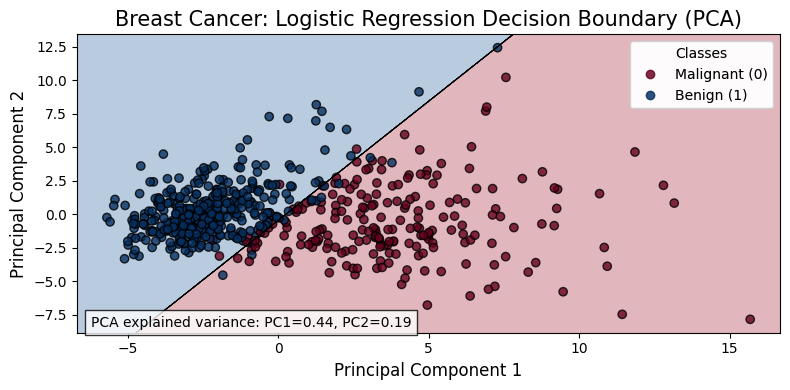

In [39]:
# Visualize the decision boundary in PCA space
plot_decision_boundary(pca_model, X_pca, y, 'Breast Cancer: Logistic Regression Decision Boundary (PCA)')

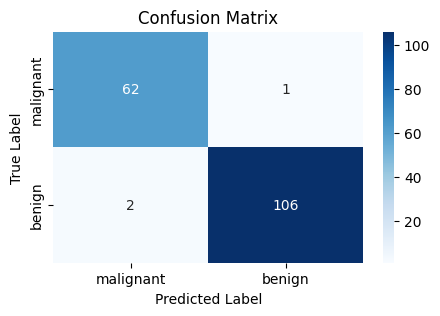

In [40]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
           xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Breast Cancer Classification with Logitic regression:
* The logistic regression model creates a linear boundary separating malignant and benign tumors
* Even with just 2 PCA components, we achieve good separation between classes
* The linear boundary works well for this dataset, demonstrating that some real-world problems can be effectively solved with simple models

#### 1.1.2. Non-linear Boundary: Random Forest on Wine Dataset

In [41]:
# Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Print dataset information
print(f"Dataset: Wine Origin")
print(f"Features: {X.shape[1]}")
print(f"Samples: {X.shape[0]}")
print(f"Classes: {wine.target_names}")
print(f"Class distribution: {np.bincount(y)}")

Dataset: Wine Origin
Features: 13
Samples: 178
Classes: ['class_0' 'class_1' 'class_2']
Class distribution: [59 71 48]


In [42]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nRandom Forest Performance:")
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=wine.target_names))


Random Forest Performance:
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        19
     class_1       1.00      1.00      1.00        21
     class_2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [49]:
# Create a meshgrid to visualize the decision boundary
def plot_decision_boundary(model, X, y, title):
    h = 0.02  # Mesh step size

    # Create meshgrid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict class probabilities for each point in the meshgrid
    # Use predict_proba instead of predict
    # Check if the model has predict_proba (most classifiers do)
    if hasattr(model, 'predict_proba'):
        Z_proba = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])
        Z = np.argmax(Z_proba, axis=1).reshape(xx.shape)
    elif hasattr(model, 'predict'):
         # For models that only have predict (like some clustering or regression converted to classification)
         # This part is less ideal for boundary plots based on probability, but included for robustness
         Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    else:
        raise AttributeError("Model must have either 'predict_proba' or 'predict' method.")


    # Plot decision boundary and data points
    fig, ax = plt.subplots(figsize=(8, 4))
    # Determine number of classes for contourf cmap
    num_classes = len(np.unique(y))
    cmap_contour = plt.cm.RdBu if num_classes <= 2 else plt.cm.viridis # Use RdBu for binary, viridis for multi
    cmap_scatter = plt.cm.RdBu if num_classes <= 2 else plt.cm.viridis

    ax.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_contour)
    ax.contour(xx, yy, Z, colors='k', linewidths=0.5)

    # Create custom color map for scatter plot
    # cmap = plt.cm.get_cmap('viridis', 3) # This line is not needed here

    # Plot data points
    # Use appropriate cmap for scatter plot based on number of classes
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y,
               edgecolors='k', cmap=cmap_scatter, alpha=0.8)

    ax.set_title(title, fontsize=15)
    ax.set_xlabel('Principal Component 1', fontsize=12)
    ax.set_ylabel('Principal Component 2', fontsize=12)

    # Add a legend
    legend1 = ax.legend(*scatter.legend_elements(),
                       loc="upper right", title="Classes")
    # Modify legend labels based on the dataset
    if 'Breast Cancer' in title:
        legend_labels = ['Malignant (0)', 'Benign (1)']
        for i, text_obj in enumerate(legend1.get_texts()):
            text_obj.set_text(legend_labels[i])
    elif 'Wine Origin' in title:
         # Assuming y maps directly to wine.target_names indices
         wine_target_names = {0: 'Class_0', 1: 'Class_1', 2: 'Class_2'} # Placeholder, replace with actual names if available
         # Need access to original target names if y is remapped
         try:
             # Access wine.target_names if available in scope
             if 'wine' in globals() and hasattr(wine, 'target_names'):
                  wine_target_names = {i: name for i, name in enumerate(wine.target_names)}
         except NameError:
             pass # wine variable might not be in scope for this function definition

         # Use regex to extract the digit from the LaTeX string and convert to int
         import re
         current_labels = []
         for item in legend1.get_texts():
             match = re.search(r'\d+', item.get_text())
             if match:
                 current_labels.append(int(match.group(0)))
             else:
                 # Handle cases where no digit is found (shouldn't happen with scatter_legend_elements)
                 current_labels.append(-1) # Or some indicator of failure


         for i, label in enumerate(current_labels):
              if label != -1: # Only remap if a digit was found
                  legend1.get_texts()[i].set_text(f'Wine Origin: {wine_target_names.get(label, f"Class {label}")}')

    elif 'Handwritten Digit' in title:
        # Use the selected_classes variable for digit labels
        try:
             if 'selected_classes' in globals():
                 # Use regex to extract the digit from the LaTeX string and convert to int
                 import re
                 current_labels_indices = []
                 for item in legend1.get_texts():
                      match = re.search(r'\d+', item.get_text())
                      if match:
                           current_labels_indices.append(int(match.group(0)))
                      else:
                           current_labels_indices.append(-1) # Indicate failure

                 legend_labels = [f'Digit {selected_classes[idx]}' for idx in current_labels_indices if idx != -1]
                 for i, text_obj in enumerate(legend1.get_texts()):
                     if i < len(legend_labels): # Ensure index is within bounds
                          text_obj.set_text(legend_labels[i])
             else:
                 pass # selected_classes not in scope
        except NameError:
            pass # selected_classes variable might not be in scope for this function definition
    else:
        # Default legend labels if dataset is unknown or binary
         pass # Keep default labels from scatter.legend_elements()

    ax.add_artist(legend1)

    # # Plot the coefficients as a vector
    # if hasattr(model, 'coef_'):
    #     coef = model.coef_[0]
    #     intercept = model.intercept_[0]

    #     # Calculate the slope of the decision boundary
    #     slope = -coef[0] / coef[1]

    #     # Create a line using the slope and intercept
    #     xx_line = np.linspace(x_min, x_max, 10)
    #     yy_line = slope * xx_line - intercept / coef[1]

    #     ax.plot(xx_line, yy_line, 'r-', linewidth=2,
    #            label=f'Decision Line: {coef[0]:.2f}*PC1 + {coef[1]:.2f}*PC2 + {intercept:.2f} = 0')
    #     ax.legend()


    # Add PCA explained variance text
    # Ensure pca variable is accessible or pass it to the function
    try:
        if 'pca' in globals() and hasattr(pca, 'explained_variance_ratio_') and pca.explained_variance_ratio_.shape[0] >= 2:
            explained_variance = pca.explained_variance_ratio_
            variance_text = f"PCA explained variance: PC1={explained_variance[0]:.2f}, PC2={explained_variance[1]:.2f}"
            # Use ax.get_figure() and ax.get_axes() to place text correctly within the specific axes of the current plot
            ax.text(0.02, 0.02, variance_text, transform=ax.transAxes,
            bbox=dict(facecolor='white', alpha=0.8))
    except NameError:
        pass # pca variable might not be in scope for this function definition


    plt.tight_layout()
    plt.show()

In [50]:
# Apply PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaler.transform(X))
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train Random Forest on PCA components
pca_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
pca_model.fit(X_train_pca, y_train)
pca_pred = pca_model.predict(X_test_pca)
pca_accuracy = accuracy_score(y_test, pca_pred)

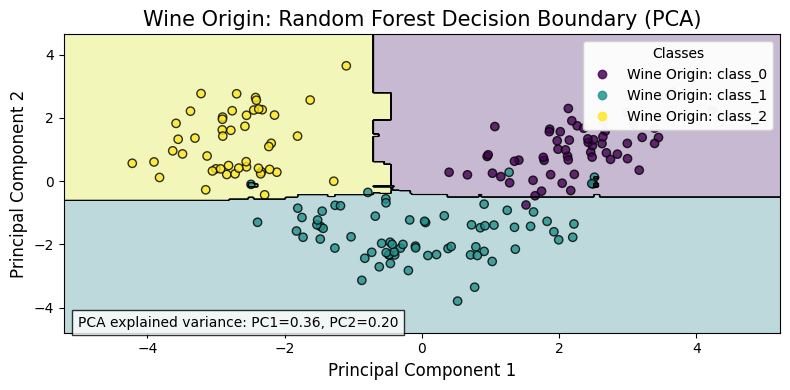

In [51]:
# Visualize the decision boundary in PCA space
plot_decision_boundary(pca_model, X_pca, y, 'Wine Origin: Random Forest Decision Boundary (PCA)')

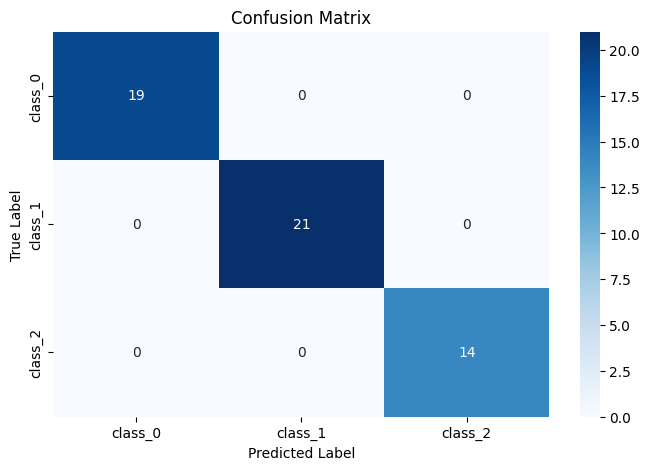

In [52]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
           xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Wine Classification with Random Forest:
* The Random Forest model creates non-linear boundaries that effectively separate the three wine origins
* The model captures complex interactions between chemical properties that linear models would miss
* Key chemical properties like flavanoids, color intensity, and proline concentration help distinguish wine origins
* The decision boundaries are more irregular, following natural patterns in the data

#### 1.1.3. Complex Boundary: Neural Network on Handwritten Digits

In [53]:
# Set random seed
np.random.seed(42)
tf.random.set_seed(42)

# Load the Digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Print dataset information
print(f"Dataset: Handwritten Digits")
print(f"Features: {X.shape[1]}")
print(f"Samples: {X.shape[0]}")
print(f"Classes: Digits 0-9")
print(f"Class distribution: {np.bincount(y)}")

Dataset: Handwritten Digits
Features: 64
Samples: 1797
Classes: Digits 0-9
Class distribution: [178 182 177 183 181 182 181 179 174 180]


In [54]:
# For visualization, let's use a subset of classes to make the boundaries clearer
# We'll use digits 0, 6, and 9 which have distinct shapes
selected_classes = [0, 6, 9]
mask = np.isin(y, selected_classes)
X_subset = X[mask]
y_subset = y[mask]

# Remap labels to be consecutive (0, 1, 2)
label_mapping = {old_label: new_label for new_label, old_label in enumerate(selected_classes)}
y_remapped = np.array([label_mapping[label] for label in y_subset])

print(f"\nUsing subset of digits: {selected_classes}")
print(f"Subset samples: {X_subset.shape[0]}")
print(f"Subset class distribution: {np.bincount(y_remapped)}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_subset, y_remapped, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Using subset of digits: [0, 6, 9]
Subset samples: 539
Subset class distribution: [178 181 180]


In [55]:
# One-hot encode the labels
y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)

In [56]:
# Build neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(3, activation='softmax')  # 3 classes
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [57]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train_scaled, y_train_onehot,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=0
)

In [58]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test_scaled, y_test_onehot, verbose=0)
y_pred_prob = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_prob, axis=1)

print(f"\nNeural Network Performance:")
print(f"Test Accuracy: {test_acc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=[f'Digit {x}' for x in selected_classes]))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

Neural Network Performance:
Test Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

     Digit 0       1.00      1.00      1.00        60
     Digit 6       1.00      1.00      1.00        47
     Digit 9       1.00      1.00      1.00        55

    accuracy                           1.00       162
   macro avg       1.00      1.00      1.00       162
weighted avg       1.00      1.00      1.00       162



In [59]:
# Apply PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaler.transform(X_subset))
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Build a 2D neural network model for visualization
model_2d = Sequential([
    Dense(32, activation='relu', input_shape=(2,)),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes
])

model_2d.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [60]:
# Train the 2D model
model_2d.fit(X_train_pca, y_train_onehot, epochs=50, batch_size=32, verbose=0)

# Evaluate 2D model
y_pred_2d = np.argmax(model_2d.predict(X_test_pca), axis=1)
pca_accuracy = accuracy_score(y_test, y_pred_2d)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [61]:
# Create a meshgrid to visualize the decision boundary
def plot_decision_boundary(model, X, y, title):
    h = 0.02  # Mesh step size

    # Create meshgrid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict class probabilities for each point in the meshgrid
    Z_proba = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.argmax(Z_proba, axis=1).reshape(xx.shape)

    # Plot decision boundary and data points
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdBu)
    ax.contour(xx, yy, Z, colors='k', linewidths=0.5)

    # Create custom color map for scatter plot
    cmap = plt.cm.get_cmap('viridis', 3)

    # Plot data points
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y,
               edgecolors='k', cmap=plt.cm.RdBu, alpha=0.8)

    ax.set_title(title, fontsize=15)
    ax.set_xlabel('Principal Component 1', fontsize=12)
    ax.set_ylabel('Principal Component 2', fontsize=12)

    # Add a legend
    legend1 = ax.legend(*scatter.legend_elements(),
                       loc="upper right", title="Classes")
    legend_labels = [item.get_text() for item in legend1.get_texts()]
    for i, label in enumerate(legend_labels):
        legend1.get_texts()[i].set_text(f'Digit {selected_classes[i]}')
    ax.add_artist(legend1)  # This line is now correct


    # # Plot the coefficients as a vector
    # if hasattr(model, 'coef_'):
    #     coef = model.coef_[0]
    #     intercept = model.intercept_[0]

    #     # Calculate the slope of the decision boundary
    #     slope = -coef[0] / coef[1]

    #     # Create a line using the slope and intercept
    #     xx_line = np.linspace(x_min, x_max, 10)
    #     yy_line = slope * xx_line - intercept / coef[1]

    #     ax.plot(xx_line, yy_line, 'r-', linewidth=2,
    #            label=f'Decision Line: {coef[0]:.2f}*PC1 + {coef[1]:.2f}*PC2 + {intercept:.2f} = 0')
    #     ax.legend()


    # Add PCA explained variance text
    explained_variance = pca.explained_variance_ratio_
    variance_text = f"PCA explained variance: PC1={explained_variance[0]:.2f}, PC2={explained_variance[1]:.2f}"
    ax.text(0.02, 0.02, variance_text, transform=plt.gca().transAxes,
    bbox=dict(facecolor='white', alpha=0.8))


    plt.tight_layout()
    plt.show()

82044/82044 ━━━━━━━━━━━━━━━━━━━━ 83s 1ms/step


<ipython-input-61-1bb2bb3a1e79>:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', 3)


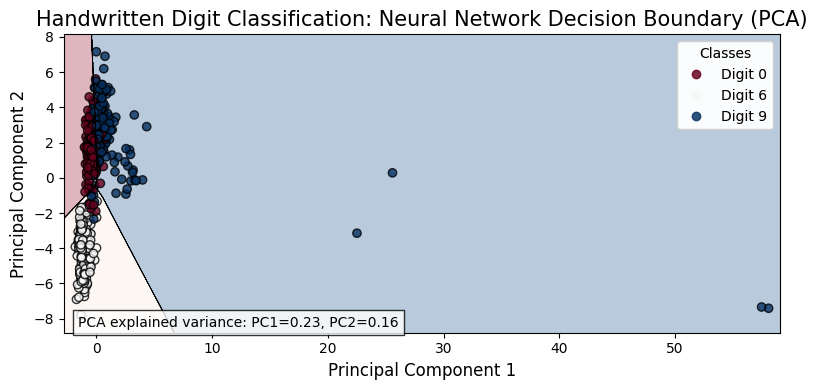

In [62]:
# Visualize the decision boundary in PCA space
plot_decision_boundary(model_2d, X_pca, y_remapped, 'Handwritten Digit Classification: Neural Network Decision Boundary (PCA)')

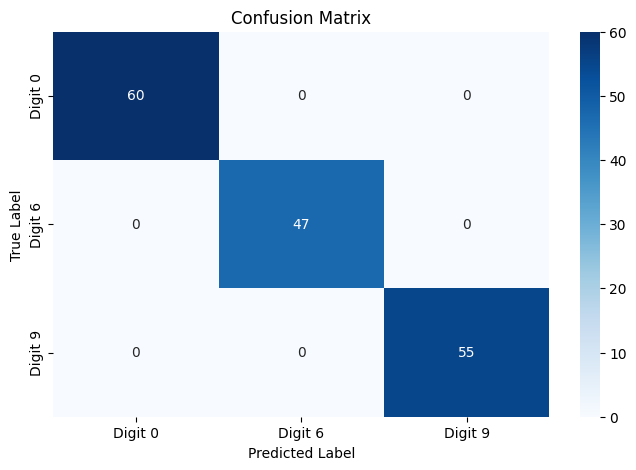

In [63]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
           xticklabels=[f'Digit {x}' for x in selected_classes],
           yticklabels=[f'Digit {x}' for x in selected_classes])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

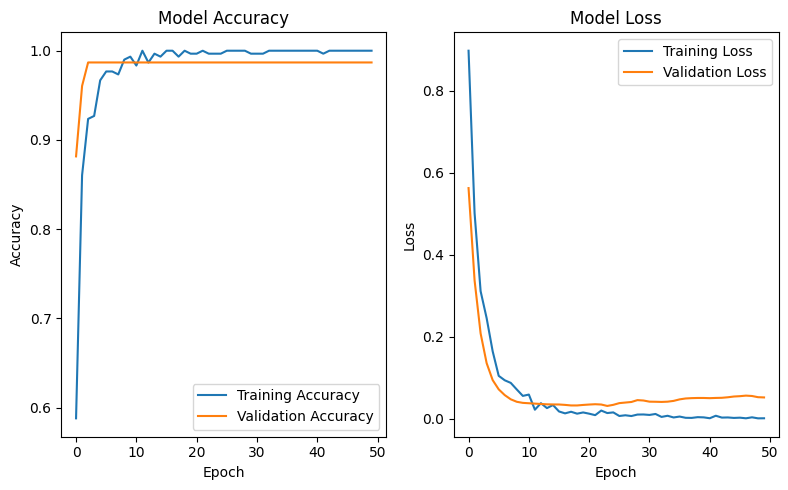

In [64]:
# Visualize learning curves
plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


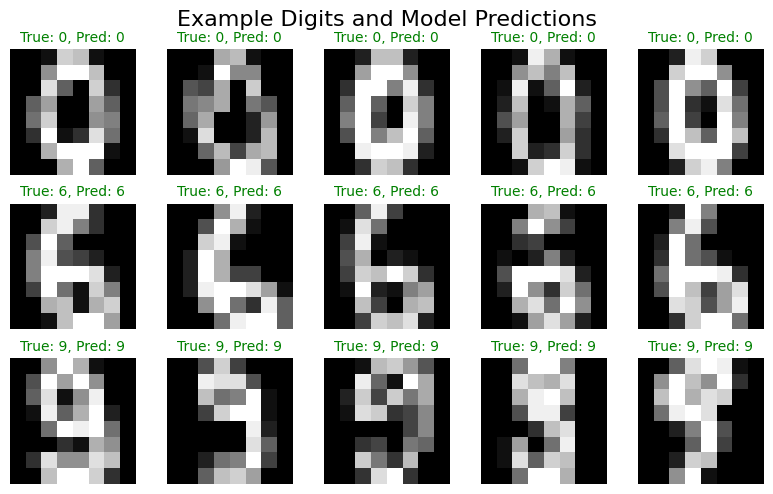

In [65]:
# Visualize example digits and their predictions
def plot_digit_examples():
    fig, axes = plt.subplots(3, 5, figsize=(8, 5))
    for i, class_idx in enumerate(selected_classes):
        # Get indices for this class
        indices = np.where(y_remapped == i)[0]

        # Select 5 random samples
        sample_indices = np.random.choice(indices, 5, replace=False)

        for j, idx in enumerate(sample_indices):
            # Plot the image
            digit_image = X_subset[idx].reshape(8, 8)
            axes[i, j].imshow(digit_image, cmap='gray')
            axes[i, j].axis('off')

            # Get model prediction
            pred = np.argmax(model.predict(scaler.transform(X_subset[idx].reshape(1, -1))))

            # Set title color based on correctness
            title_color = 'green' if pred == i else 'red'
            axes[i, j].set_title(f'True: {selected_classes[i]}, Pred: {selected_classes[pred]}',
                                color=title_color, fontsize=10)

    plt.suptitle('Example Digits and Model Predictions', fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

plot_digit_examples()

Digit Classification with NN:
* The neural network creates complex, highly non-linear decision boundaries that adapt to the intricate patterns in handwritten digits
* Even when reduced to 2D using PCA, the model captures the essential differences between digit shapes
* The boundaries show smooth transitions that follow the natural distribution of the data
* Performance remains strong even in lower dimensions, demonstrating the model's ability to extract meaningful patterns

### 1.2. Regression Diagnostics: Visualizing Fit Quality in Regression Models
In this example we'demonstrates different regression fitting issues with comprehensive visualizations. We'll generate synthetic data to clearly illustrate each case.

In [67]:
# Set random seed and styling
np.random.seed(42)
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [12, 8]

#### 1.2.1. GOOD FIT (RANDOM RESIDUALS)

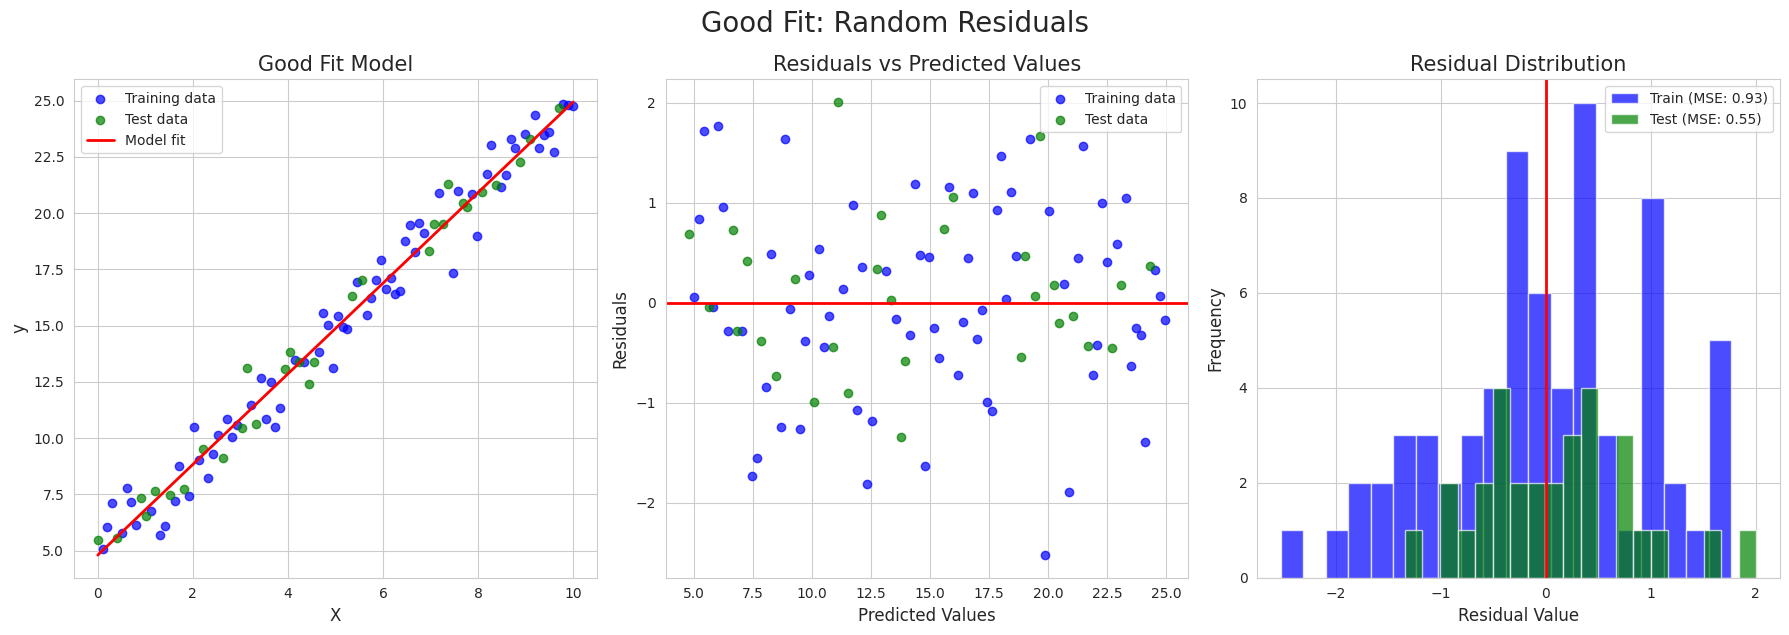

Good Fit Model:
Coefficient: 2.0130
Intercept: 4.8061
Training MSE: 0.9273
Test MSE: 0.5549
MSE Ratio (Test/Train): 0.5984


In [68]:
def create_good_fit_example():
    # Generate linear data with random noise
    X = np.linspace(0, 10, 100).reshape(-1, 1)
    y = 2 * X.flatten() + 5 + np.random.normal(0, 1, size=100)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Fit linear model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate errors
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    # Create figure with 3 subplots
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Plot 1: Data and model fit
    axes[0].scatter(X_train, y_train, color='blue', alpha=0.7, label='Training data')
    axes[0].scatter(X_test, y_test, color='green', alpha=0.7, label='Test data')
    axes[0].plot(X, model.predict(X), color='red', linewidth=2, label='Model fit')
    axes[0].set_title('Good Fit Model', fontsize=15)
    axes[0].set_xlabel('X', fontsize=12)
    axes[0].set_ylabel('y', fontsize=12)
    axes[0].legend()

    # Plot 2: Residuals vs Predicted
    train_residuals = y_train - y_train_pred
    test_residuals = y_test - y_test_pred

    axes[1].scatter(y_train_pred, train_residuals, color='blue', alpha=0.7, label='Training data')
    axes[1].scatter(y_test_pred, test_residuals, color='green', alpha=0.7, label='Test data')
    axes[1].axhline(y=0, color='red', linestyle='-', linewidth=2)
    axes[1].set_title('Residuals vs Predicted Values', fontsize=15)
    axes[1].set_xlabel('Predicted Values', fontsize=12)
    axes[1].set_ylabel('Residuals', fontsize=12)
    axes[1].legend()

    # Plot 3: Residual histogram
    axes[2].hist(train_residuals, bins=20, alpha=0.7, color='blue', label=f'Train (MSE: {train_mse:.2f})')
    axes[2].hist(test_residuals, bins=20, alpha=0.7, color='green', label=f'Test (MSE: {test_mse:.2f})')
    axes[2].axvline(x=0, color='red', linestyle='-', linewidth=2)
    axes[2].set_title('Residual Distribution', fontsize=15)
    axes[2].set_xlabel('Residual Value', fontsize=12)
    axes[2].set_ylabel('Frequency', fontsize=12)
    axes[2].legend()

    plt.tight_layout()
    plt.suptitle('Good Fit: Random Residuals', fontsize=20, y=1.05)
    plt.show()

    # Print model details
    print("Good Fit Model:")
    print(f"Coefficient: {model.coef_[0]:.4f}")
    print(f"Intercept: {model.intercept_:.4f}")
    print(f"Training MSE: {train_mse:.4f}")
    print(f"Test MSE: {test_mse:.4f}")
    print(f"MSE Ratio (Test/Train): {test_mse/train_mse:.4f}")

create_good_fit_example()

Residuals are randomly distributed around zero with no discernible pattern
Visual Indicators:
* Points scattered randomly above and below the regression line
* Residual plot shows random cloud around zero with no pattern
* Residual histogram looks approximately normal and centered at zero
  
**Statistical Signs:** Training and test errors are similar in magnitude

**Interpretation:** Model captures the true data relationship without missing important patterns or overfitting noise


#### 1.2.2. UNDERFITTING (SYSTEMATIC PATTERN IN RESIDUALS)

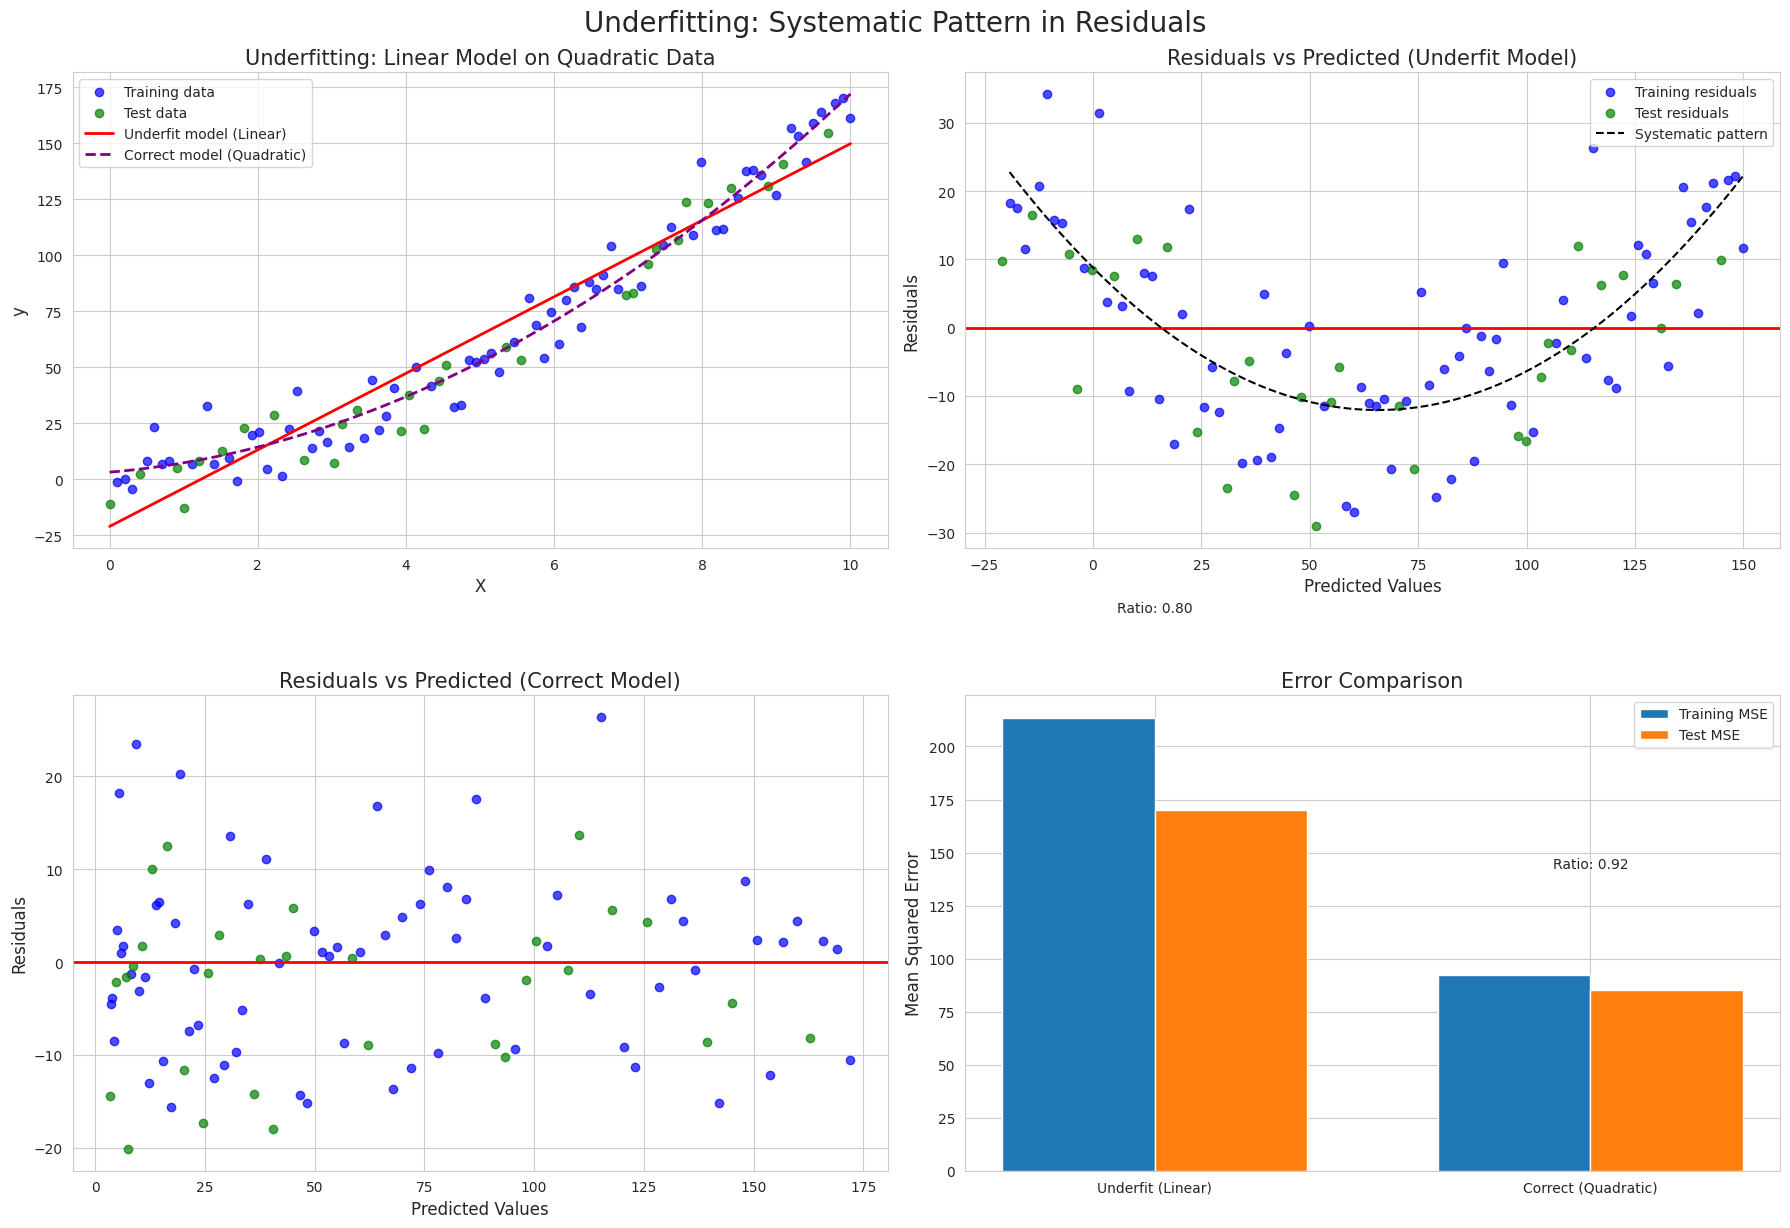


Underfitting Model (Linear):
Coefficient: 17.0851
Intercept: -20.9677
Training MSE: 213.5932
Test MSE: 170.2043
MSE Ratio (Test/Train): 0.7969


In [69]:
def create_underfitting_example():
    # Generate non-linear (quadratic) data
    X = np.linspace(0, 10, 100).reshape(-1, 1)
    y = 1.5 * X.flatten()**2 + 2 * X.flatten() + 3 + np.random.normal(0, 10, size=100)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Fit a linear model (too simple for quadratic data)
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate errors
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    # For comparison, fit the correct model (quadratic)
    correct_model = Pipeline([
        ('poly', PolynomialFeatures(degree=2)),
        ('linear', LinearRegression())
    ])
    correct_model.fit(X_train, y_train)

    # Make predictions with correct model
    y_train_pred_correct = correct_model.predict(X_train)
    y_test_pred_correct = correct_model.predict(X_test)

    # Calculate errors for correct model
    train_mse_correct = mean_squared_error(y_train, y_train_pred_correct)
    test_mse_correct = mean_squared_error(y_test, y_test_pred_correct)

    # Create figure with 3 subplots
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))

    # Plot 1: Data and underfitting model
    axes[0, 0].scatter(X_train, y_train, color='blue', alpha=0.7, label='Training data')
    axes[0, 0].scatter(X_test, y_test, color='green', alpha=0.7, label='Test data')

    # Plot both models
    X_plot = np.linspace(0, 10, 100).reshape(-1, 1)
    axes[0, 0].plot(X_plot, model.predict(X_plot), color='red', linewidth=2,
                 label=f'Underfit model (Linear)')
    axes[0, 0].plot(X_plot, correct_model.predict(X_plot), color='purple', linewidth=2,
                 linestyle='--', label=f'Correct model (Quadratic)')

    axes[0, 0].set_title('Underfitting: Linear Model on Quadratic Data', fontsize=15)
    axes[0, 0].set_xlabel('X', fontsize=12)
    axes[0, 0].set_ylabel('y', fontsize=12)
    axes[0, 0].legend()

    # Plot 2: Residuals vs Predicted for underfit model
    train_residuals = y_train - y_train_pred
    test_residuals = y_test - y_test_pred

    axes[0, 1].scatter(y_train_pred, train_residuals, color='blue', alpha=0.7, label='Training residuals')
    axes[0, 1].scatter(y_test_pred, test_residuals, color='green', alpha=0.7, label='Test residuals')
    axes[0, 1].axhline(y=0, color='red', linestyle='-', linewidth=2)

    # Fit a curve to residuals to highlight the pattern
    z = np.polyfit(y_train_pred, train_residuals, 2)
    p = np.poly1d(z)
    x_line = np.linspace(min(y_train_pred), max(y_train_pred), 100)
    axes[0, 1].plot(x_line, p(x_line), color='black', linestyle='--',
                 label='Systematic pattern')

    axes[0, 1].set_title('Residuals vs Predicted (Underfit Model)', fontsize=15)
    axes[0, 1].set_xlabel('Predicted Values', fontsize=12)
    axes[0, 1].set_ylabel('Residuals', fontsize=12)
    axes[0, 1].legend()

    # Plot 3: Residuals vs Predicted for correct model
    train_residuals_correct = y_train - y_train_pred_correct
    test_residuals_correct = y_test - y_test_pred_correct

    axes[1, 0].scatter(y_train_pred_correct, train_residuals_correct, color='blue', alpha=0.7)
    axes[1, 0].scatter(y_test_pred_correct, test_residuals_correct, color='green', alpha=0.7)
    axes[1, 0].axhline(y=0, color='red', linestyle='-', linewidth=2)
    axes[1, 0].set_title('Residuals vs Predicted (Correct Model)', fontsize=15)
    axes[1, 0].set_xlabel('Predicted Values', fontsize=12)
    axes[1, 0].set_ylabel('Residuals', fontsize=12)

    # Plot 4: Error comparison
    model_names = ['Underfit (Linear)', 'Correct (Quadratic)']
    train_errors = [train_mse, train_mse_correct]
    test_errors = [test_mse, test_mse_correct]

    x = np.arange(len(model_names))
    width = 0.35

    axes[1, 1].bar(x - width/2, train_errors, width, label='Training MSE')
    axes[1, 1].bar(x + width/2, test_errors, width, label='Test MSE')

    axes[1, 1].set_ylabel('Mean Squared Error', fontsize=12)
    axes[1, 1].set_title('Error Comparison', fontsize=15)
    axes[1, 1].set_xticks(x)
    axes[1, 1].set_xticklabels(model_names)
    axes[1, 1].legend()

    # Add ratio text
    for i, model_name in enumerate(model_names):
        ratio = test_errors[i] / train_errors[i]
        axes[1, 1].text(i, max(train_errors[i], test_errors[i]) + 50,
                      f'Ratio: {ratio:.2f}', ha='center')

    plt.tight_layout()
    plt.suptitle('Underfitting: Systematic Pattern in Residuals', fontsize=20, y=1.02)
    plt.show()

    # Print model details
    print("\nUnderfitting Model (Linear):")
    print(f"Coefficient: {model.coef_[0]:.4f}")
    print(f"Intercept: {model.intercept_:.4f}")
    print(f"Training MSE: {train_mse:.4f}")
    print(f"Test MSE: {test_mse:.4f}")
    print(f"MSE Ratio (Test/Train): {test_mse/train_mse:.4f}")

create_underfitting_example()

Model is too simple to capture the underlying pattern in the data
* Clear U-shaped (or other systematic) pattern in residuals plot
* Model line misses obvious trends in the data
* Both training and test errors are high
* **Causes:**
  * Linear model applied to non-linear data
  * Missing important variables or interactions
  * Over-simplified structure
* **Solution:** Increase model complexity (add polynomial terms, interaction terms, or use more flexible models)

#### 1.2.3. OVERFITTING (LOW TRAIN ERROR, HIGH TEST ERROR)

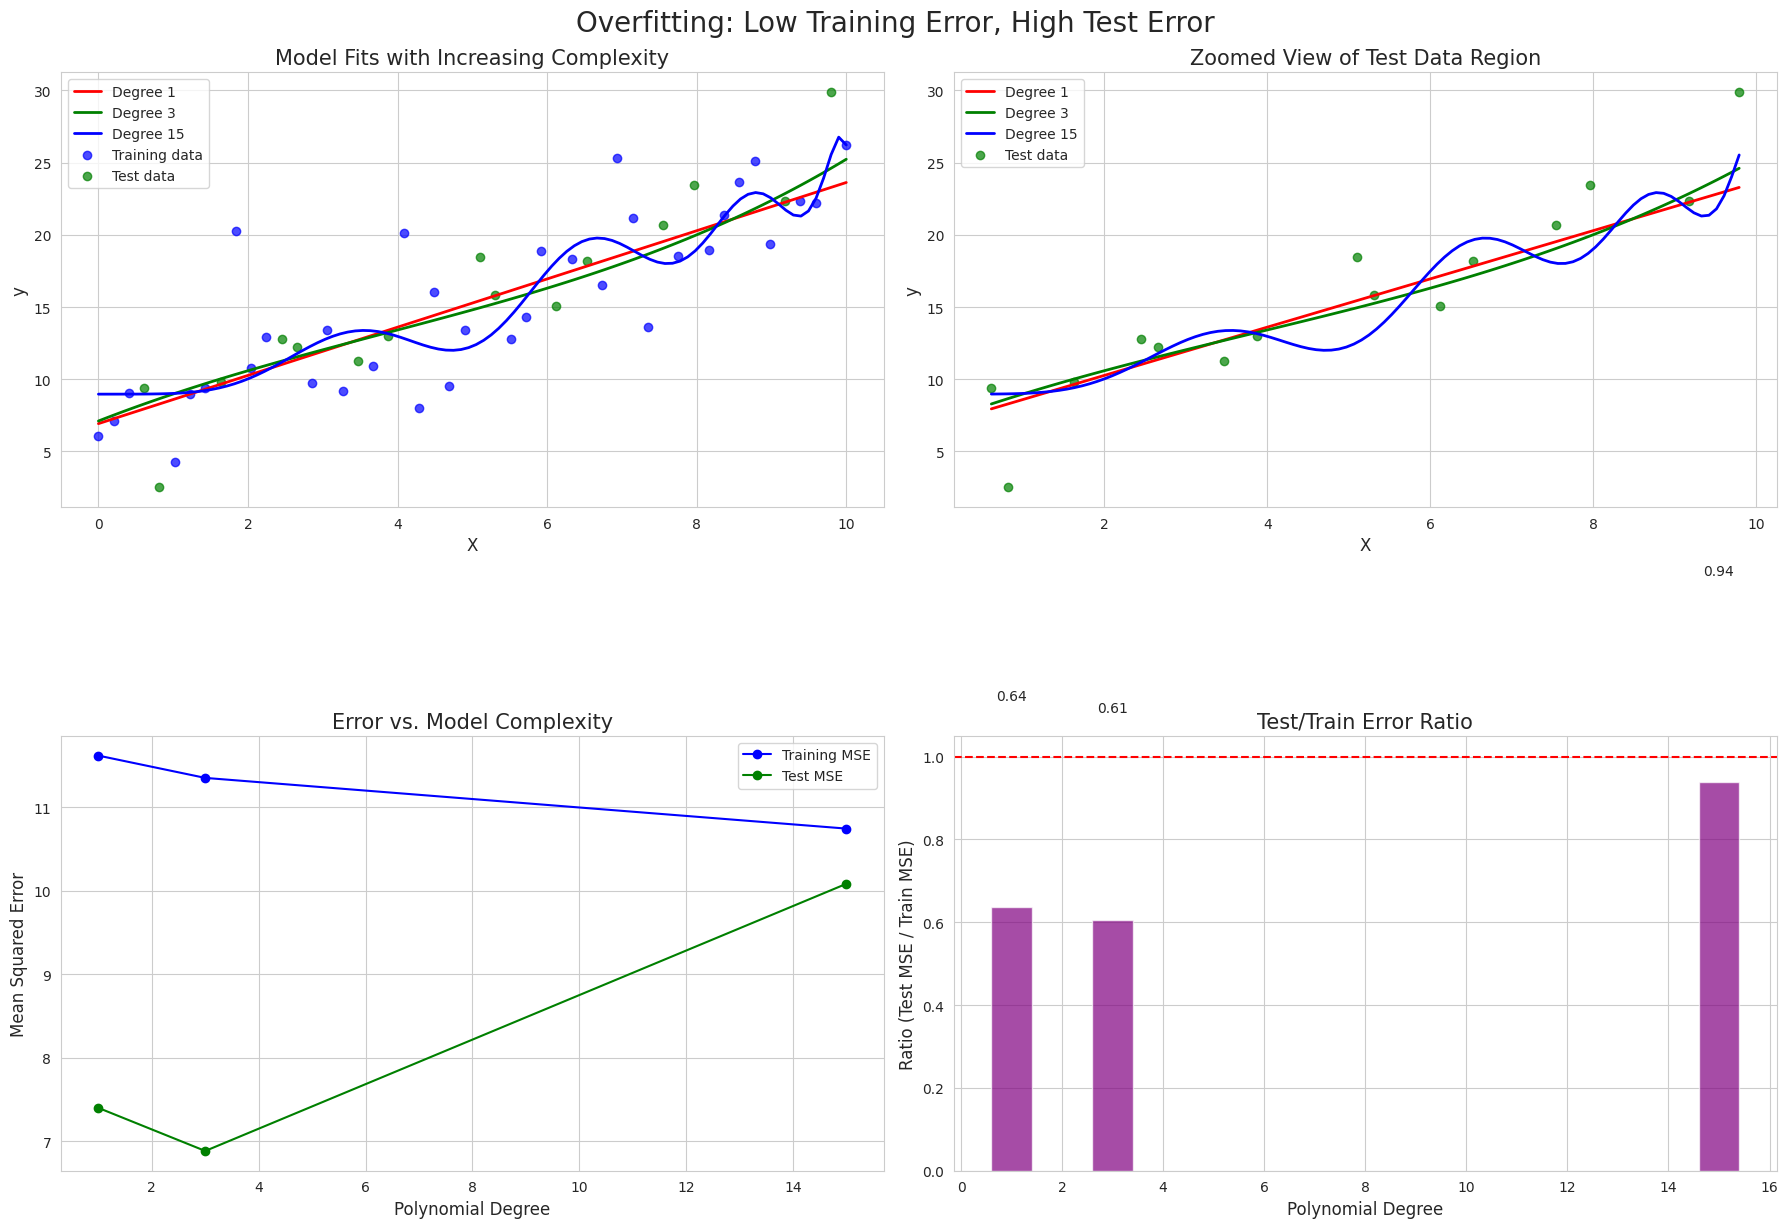


Overfitting Analysis:
Polynomial  Train MSE   Test MSE   Ratio
------------------------------------------
Degree 1     11.6187    7.4008     0.6370
Degree 3     11.3519    6.8856     0.6066
Degree 15    10.7451    10.0836    0.9384


In [70]:
def create_overfitting_example():
    # Generate nearly linear data with some noise
    X = np.linspace(0, 10, 50).reshape(-1, 1)
    y = 2 * X.flatten() + 5 + np.random.normal(0, 3, size=50)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Define models with increasing complexity
    degrees = [1, 3, 15]  # Linear, moderate, very high polynomial
    colors = ['red', 'green', 'blue']

    # Create figure
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))

    train_mse_values = []
    test_mse_values = []

    # Fit models of increasing complexity
    for i, degree in enumerate(degrees):
        # Create polynomial features
        model = Pipeline([
            ('poly', PolynomialFeatures(degree=degree)),
            ('linear', LinearRegression())
        ])
        model.fit(X_train, y_train)

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Calculate errors
        train_mse = mean_squared_error(y_train, y_train_pred)
        test_mse = mean_squared_error(y_test, y_test_pred)

        train_mse_values.append(train_mse)
        test_mse_values.append(test_mse)

        # Plot model fit
        X_plot = np.linspace(0, 10, 100).reshape(-1, 1)
        axes[0, 0].plot(X_plot, model.predict(X_plot), color=colors[i], linewidth=2,
                     label=f'Degree {degree}')

    # Plot data points
    axes[0, 0].scatter(X_train, y_train, color='blue', alpha=0.7, label='Training data')
    axes[0, 0].scatter(X_test, y_test, color='green', alpha=0.7, label='Test data')
    axes[0, 0].set_title('Model Fits with Increasing Complexity', fontsize=15)
    axes[0, 0].set_xlabel('X', fontsize=12)
    axes[0, 0].set_ylabel('y', fontsize=12)
    axes[0, 0].legend()

    # Plot zoomed version highlighting overfitting
    X_plot = np.linspace(min(X_test), max(X_test), 100).reshape(-1, 1)
    for i, degree in enumerate(degrees):
        model = Pipeline([
            ('poly', PolynomialFeatures(degree=degree)),
            ('linear', LinearRegression())
        ])
        model.fit(X_train, y_train)

        axes[0, 1].plot(X_plot, model.predict(X_plot), color=colors[i], linewidth=2,
                     label=f'Degree {degree}')

    axes[0, 1].scatter(X_test, y_test, color='green', alpha=0.7, label='Test data')
    axes[0, 1].set_title('Zoomed View of Test Data Region', fontsize=15)
    axes[0, 1].set_xlabel('X', fontsize=12)
    axes[0, 1].set_ylabel('y', fontsize=12)
    axes[0, 1].legend()

    # Plot errors vs complexity
    axes[1, 0].plot(degrees, train_mse_values, 'o-', color='blue', label='Training MSE')
    axes[1, 0].plot(degrees, test_mse_values, 'o-', color='green', label='Test MSE')
    axes[1, 0].set_title('Error vs. Model Complexity', fontsize=15)
    axes[1, 0].set_xlabel('Polynomial Degree', fontsize=12)
    axes[1, 0].set_ylabel('Mean Squared Error', fontsize=12)
    axes[1, 0].legend()

    # Compute ratio of test/train error
    ratio_values = [test/train for test, train in zip(test_mse_values, train_mse_values)]

    # Plot ratio as bar chart
    axes[1, 1].bar(degrees, ratio_values, color='purple', alpha=0.7)
    axes[1, 1].axhline(y=1, color='red', linestyle='--', label='Equal train/test error')
    axes[1, 1].set_title('Test/Train Error Ratio', fontsize=15)
    axes[1, 1].set_xlabel('Polynomial Degree', fontsize=12)
    axes[1, 1].set_ylabel('Ratio (Test MSE / Train MSE)', fontsize=12)

    # Add labels to bars
    for i, v in enumerate(ratio_values):
        axes[1, 1].text(degrees[i], v + 0.5, f'{v:.2f}', ha='center')

    plt.tight_layout()
    plt.suptitle('Overfitting: Low Training Error, High Test Error', fontsize=20, y=1.02)
    plt.show()

    # Print detailed results
    print("\nOverfitting Analysis:")
    print("Polynomial  Train MSE   Test MSE   Ratio")
    print("------------------------------------------")
    for degree, train_mse, test_mse, ratio in zip(degrees, train_mse_values, test_mse_values, ratio_values):
        print(f"Degree {degree:<2}    {train_mse:<10.4f} {test_mse:<10.4f} {ratio:.4f}")

create_overfitting_example()

Model fits training data extremely well but fails to generalize to new data
* Model curve passes through nearly all training points
* Highly complex, wiggly line that captures noise instead of true relationship
* Large diffrence between training and test error
* Error ratio (test/train) increases dramatically with model complexity
* **Causes:**
  * Too many parameters relative to data points
  * Excessively high polynomial degree
  * Insufficient regularization
* **Solution:** Simplify model, add regularization, increase training data, or use cross-validation to select model complexity


#### 1.2.4. HETEROSCEDASTICITY (VARIANCE INCREASES WITH PREDICTED VALUE)

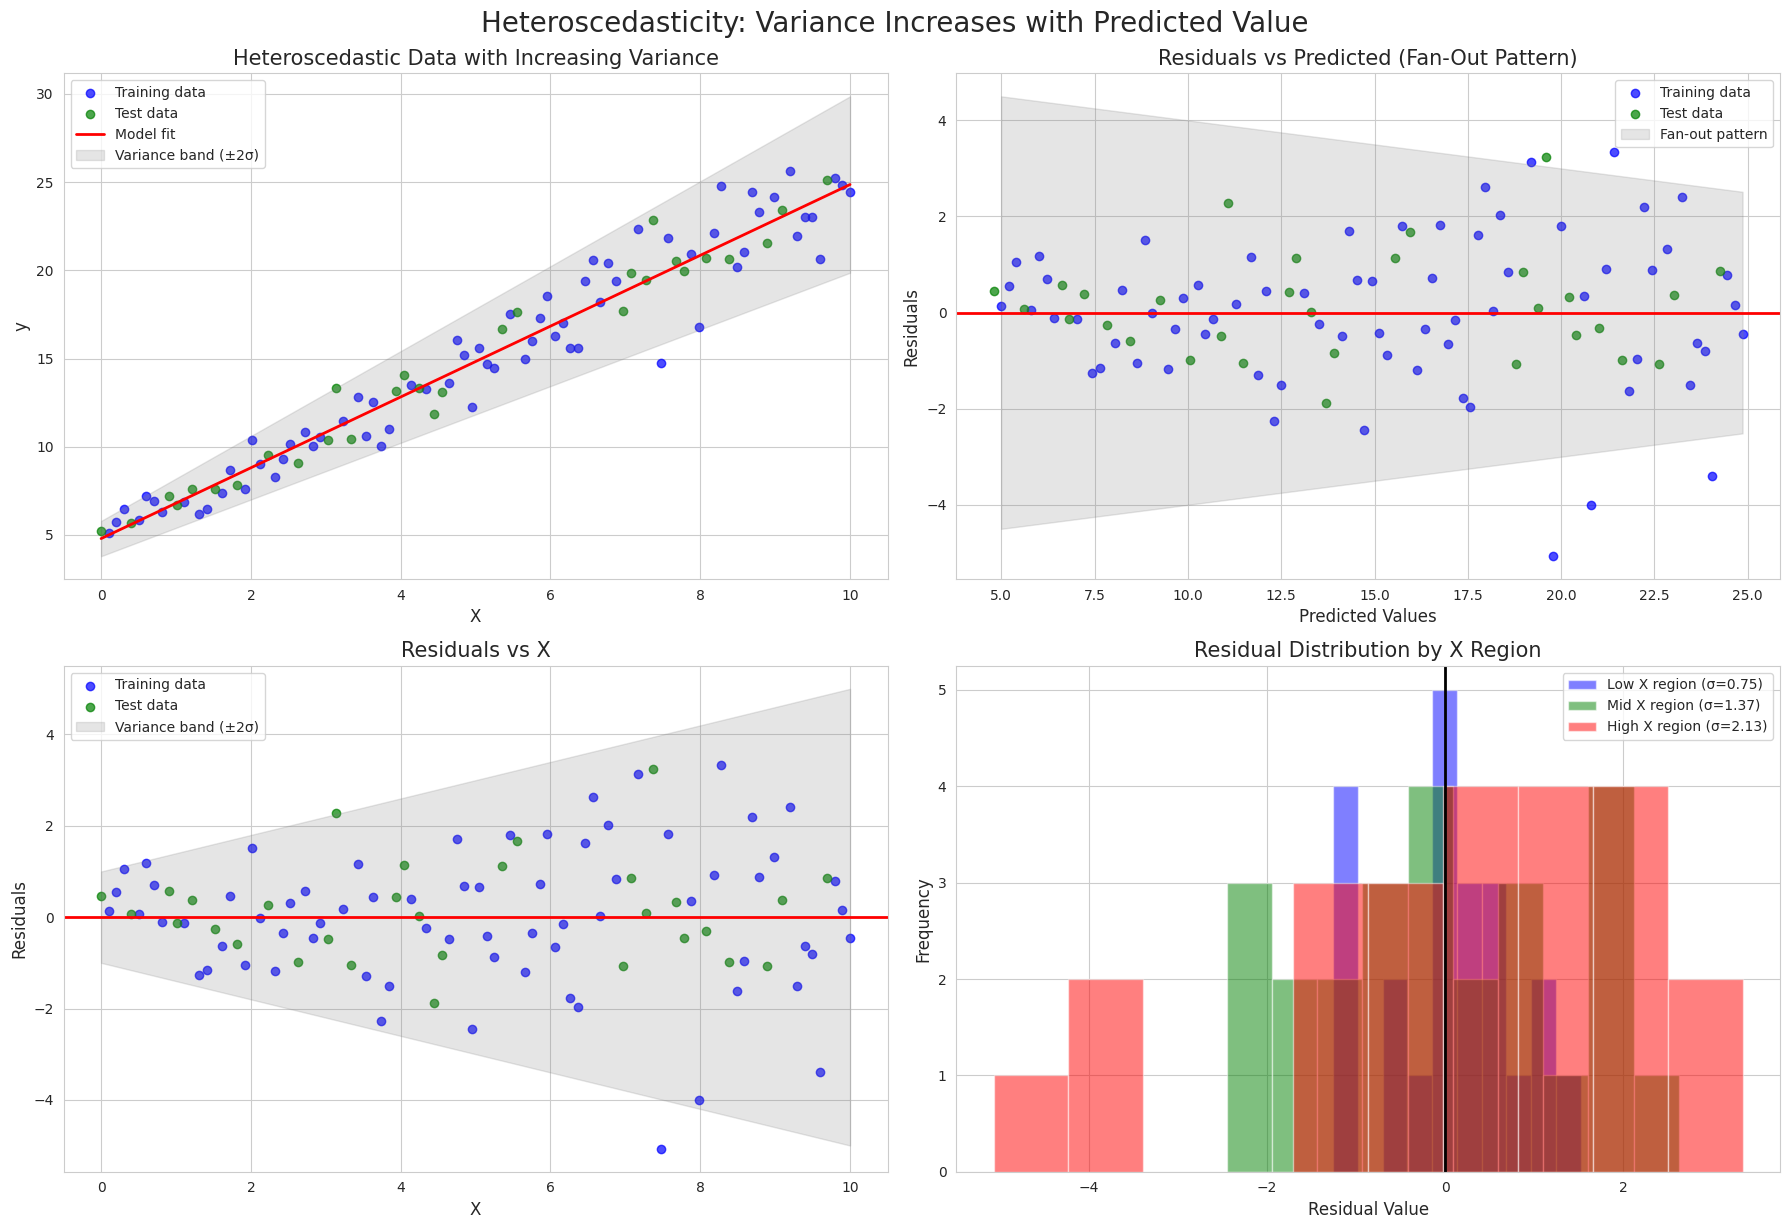


Heteroscedasticity Analysis:
Coefficient: 2.0070
Intercept: 4.7921
Training MSE: 2.3454
Test MSE: 1.1409
Overall residual std dev: 1.5315

Residual standard deviation by region:
Low X region (X < 3.3): 0.7543
Mid X region (3.3 ≤ X ≤ 6.6): 1.3746
High X region (X > 6.6): 2.1278


In [71]:
def create_heteroscedasticity_example():
    # Generate data with increasing variance
    np.random.seed(42)
    X = np.linspace(0, 10, 100).reshape(-1, 1)

    # Create noise that increases with X
    noise_scale = 0.2 * X.flatten() + 0.5
    noise = np.array([np.random.normal(0, scale) for scale in noise_scale])

    y = 2 * X.flatten() + 5 + noise

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Fit linear model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate errors
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    # Calculate residuals
    train_residuals = y_train - y_train_pred
    test_residuals = y_test - y_test_pred

    # Create figure with 2x2 subplots
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))

    # Plot 1: Data and model fit
    axes[0, 0].scatter(X_train, y_train, color='blue', alpha=0.7, label='Training data')
    axes[0, 0].scatter(X_test, y_test, color='green', alpha=0.7, label='Test data')
    X_plot = np.linspace(0, 10, 100).reshape(-1, 1)
    axes[0, 0].plot(X_plot, model.predict(X_plot), color='red', linewidth=2, label='Model fit')

    # Add variance bands
    axes[0, 0].fill_between(
        X_plot.flatten(),
        model.predict(X_plot) - (0.2 * X_plot.flatten() + 0.5) * 2,
        model.predict(X_plot) + (0.2 * X_plot.flatten() + 0.5) * 2,
        color='gray', alpha=0.2, label='Variance band (±2σ)'
    )

    axes[0, 0].set_title('Heteroscedastic Data with Increasing Variance', fontsize=15)
    axes[0, 0].set_xlabel('X', fontsize=12)
    axes[0, 0].set_ylabel('y', fontsize=12)
    axes[0, 0].legend()

    # Plot 2: Residuals vs Predicted
    axes[0, 1].scatter(y_train_pred, train_residuals, color='blue', alpha=0.7, label='Training data')
    axes[0, 1].scatter(y_test_pred, test_residuals, color='green', alpha=0.7, label='Test data')
    axes[0, 1].axhline(y=0, color='red', linestyle='-', linewidth=2)

    # Add a cone to highlight the pattern
    x_line = np.linspace(min(y_train_pred), max(y_train_pred), 100)
    upper_bound = 0.1 * x_line - 5
    lower_bound = -0.1 * x_line + 5
    axes[0, 1].fill_between(x_line, lower_bound, upper_bound, color='gray', alpha=0.2,
                         label='Fan-out pattern')

    axes[0, 1].set_title('Residuals vs Predicted (Fan-Out Pattern)', fontsize=15)
    axes[0, 1].set_xlabel('Predicted Values', fontsize=12)
    axes[0, 1].set_ylabel('Residuals', fontsize=12)
    axes[0, 1].legend()

    # Plot 3: Residuals vs X
    axes[1, 0].scatter(X_train, train_residuals, color='blue', alpha=0.7, label='Training data')
    axes[1, 0].scatter(X_test, test_residuals, color='green', alpha=0.7, label='Test data')
    axes[1, 0].axhline(y=0, color='red', linestyle='-', linewidth=2)

    # Add variance bands
    x_line = np.linspace(0, 10, 100)
    axes[1, 0].fill_between(
        x_line,
        -(0.2 * x_line + 0.5) * 2,
        (0.2 * x_line + 0.5) * 2,
        color='gray', alpha=0.2, label='Variance band (±2σ)'
    )

    axes[1, 0].set_title('Residuals vs X', fontsize=15)
    axes[1, 0].set_xlabel('X', fontsize=12)
    axes[1, 0].set_ylabel('Residuals', fontsize=12)
    axes[1, 0].legend()

    # Plot 4: Residual histogram by region
    # Split data into low, medium, high X regions
    low_idx = X_train.flatten() < 3.3
    high_idx = X_train.flatten() > 6.6
    mid_idx = ~(low_idx | high_idx)

    low_residuals = train_residuals[low_idx]
    mid_residuals = train_residuals[mid_idx]
    high_residuals = train_residuals[high_idx]

    # Plot histograms
    axes[1, 1].hist(low_residuals, bins=10, alpha=0.5, color='blue',
                   label=f'Low X region (σ={np.std(low_residuals):.2f})')
    axes[1, 1].hist(mid_residuals, bins=10, alpha=0.5, color='green',
                   label=f'Mid X region (σ={np.std(mid_residuals):.2f})')
    axes[1, 1].hist(high_residuals, bins=10, alpha=0.5, color='red',
                   label=f'High X region (σ={np.std(high_residuals):.2f})')

    axes[1, 1].axvline(x=0, color='black', linestyle='-', linewidth=2)
    axes[1, 1].set_title('Residual Distribution by X Region', fontsize=15)
    axes[1, 1].set_xlabel('Residual Value', fontsize=12)
    axes[1, 1].set_ylabel('Frequency', fontsize=12)
    axes[1, 1].legend()

    plt.tight_layout()
    plt.suptitle('Heteroscedasticity: Variance Increases with Predicted Value', fontsize=20, y=1.02)
    plt.show()

    # Print model details and diagnostics
    print("\nHeteroscedasticity Analysis:")
    print(f"Coefficient: {model.coef_[0]:.4f}")
    print(f"Intercept: {model.intercept_:.4f}")
    print(f"Training MSE: {train_mse:.4f}")
    print(f"Test MSE: {test_mse:.4f}")
    print(f"Overall residual std dev: {np.std(train_residuals):.4f}")

    print("\nResidual standard deviation by region:")
    print(f"Low X region (X < 3.3): {np.std(low_residuals):.4f}")
    print(f"Mid X region (3.3 ≤ X ≤ 6.6): {np.std(mid_residuals):.4f}")
    print(f"High X region (X > 6.6): {np.std(high_residuals):.4f}")

create_heteroscedasticity_example()

Residual variance is not constant but changes systematically with predictor variables
* Fan-shaped pattern in residual plot (wider at one end)
* Increasing spread of points around regression line
* Different residual distributions for different X regions
* **Consequences:**
  * Inefficient parameter estimates
  * Biased standard errors
  * Invalid confidence intervals and hypothesis tests
* **Solutions:**
  * Transform variables (often log transformation)
  * Use weighted least squares
  * Use robust standard errors
  * Apply generalized least squares (GLS)

## 2. Unsupervised Learning examples

### 2.1. Clustering methods

#### 2.2.1. K-Means Clustering

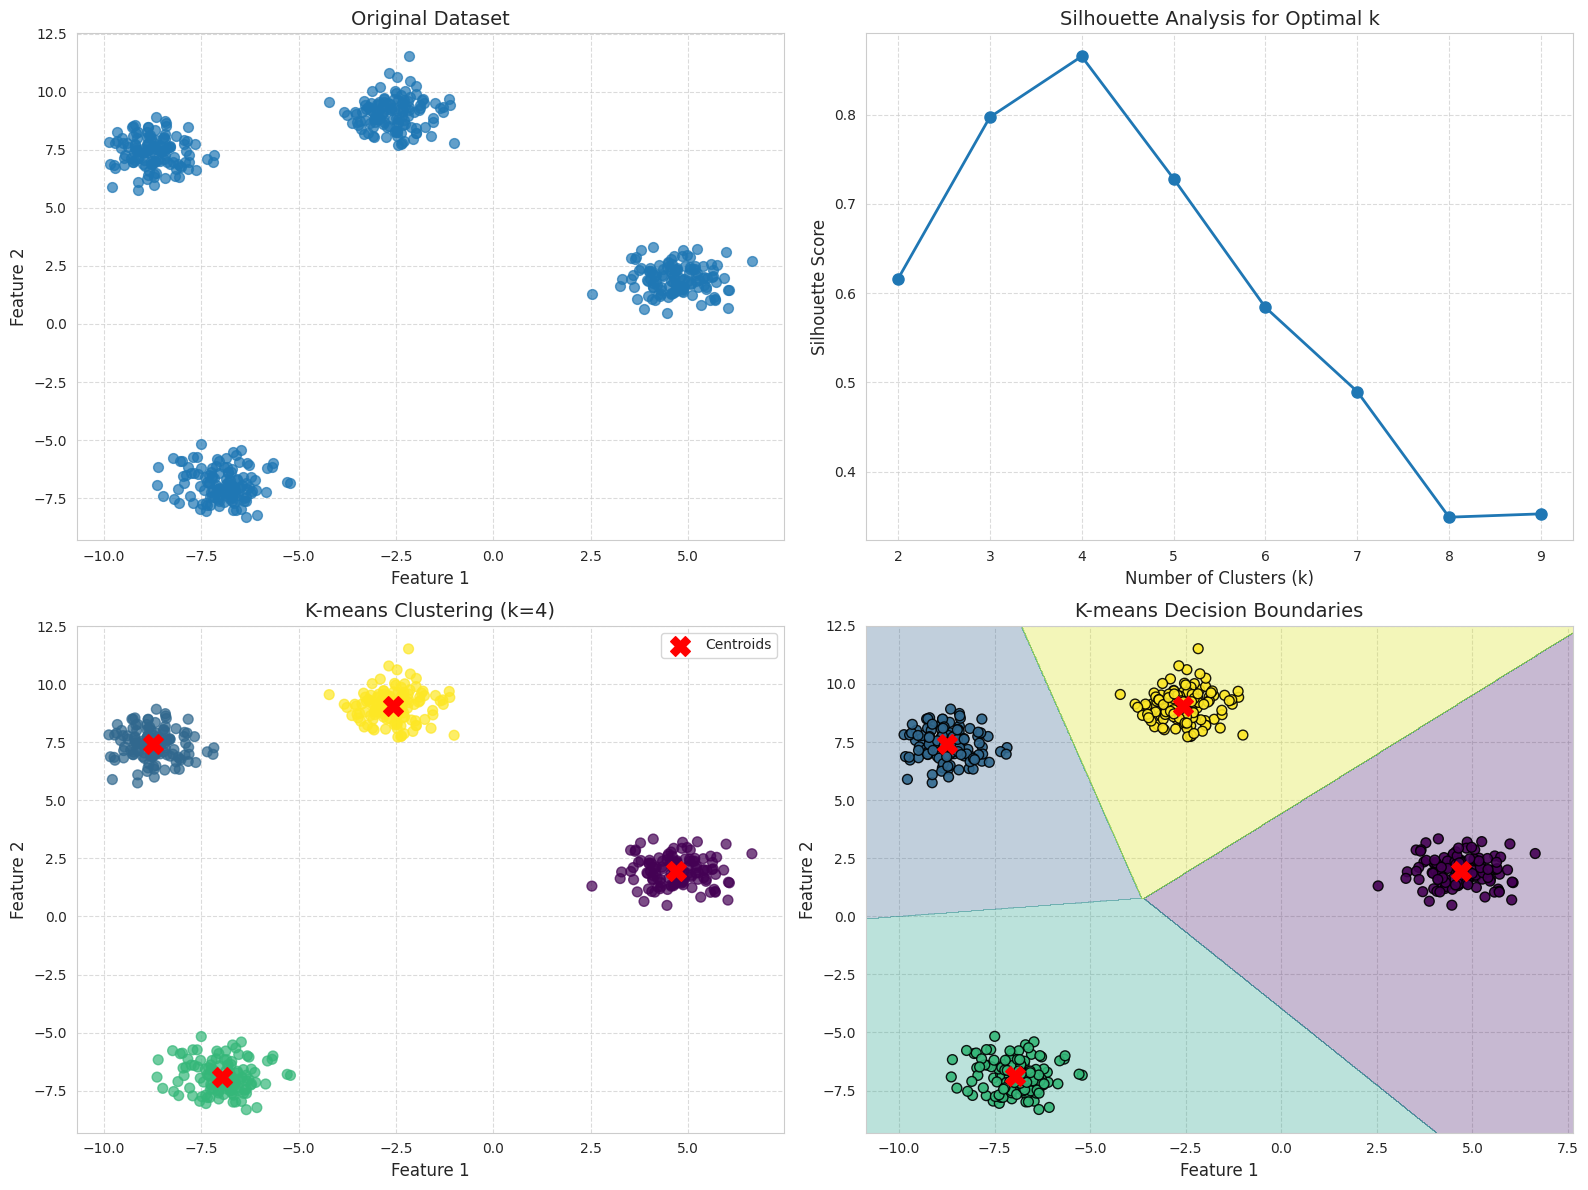

Optimal number of clusters found: 4
Silhouette score: 0.8652


In [80]:
# Set random seed for reproducibility
np.random.seed(42)
plt.figure(figsize=(16, 12))

# Generate synthetic clustered data
X, y_true = make_blobs(n_samples=500, centers=4, cluster_std=0.65, random_state=42)

# Visualize the original data
plt.subplot(2, 2, 1)
plt.scatter(X[:, 0], X[:, 1], s=50, alpha=0.7)
plt.title('Original Dataset', fontsize=14)
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Apply K-means with varying number of clusters
silhouette_scores = []
k_values = range(2, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, labels))

# Plot silhouette scores for different k values
plt.subplot(2, 2, 2)
plt.plot(k_values, silhouette_scores, 'o-', linewidth=2, markersize=8)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.title('Silhouette Analysis for Optimal k', fontsize=14)

# Apply K-means with the optimal k
optimal_k = k_values[np.argmax(silhouette_scores)]
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

# Visualize the clustering results
plt.subplot(2, 2, 3)
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, s=50, cmap='viridis', alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title(f'K-means Clustering (k={optimal_k})', fontsize=14)
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Visualize decision boundaries
plt.subplot(2, 2, 4)

# Create a mesh grid
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the cluster for each point in the mesh
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, s=50, cmap='viridis', alpha=0.9, edgecolor='k')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X')
plt.title('K-means Decision Boundaries', fontsize=14)
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

print(f"Optimal number of clusters found: {optimal_k}")
print(f"Silhouette score: {silhouette_scores[np.argmax(silhouette_scores)]:.4f}")

#### 2.2.2. Hierarchical Clustering

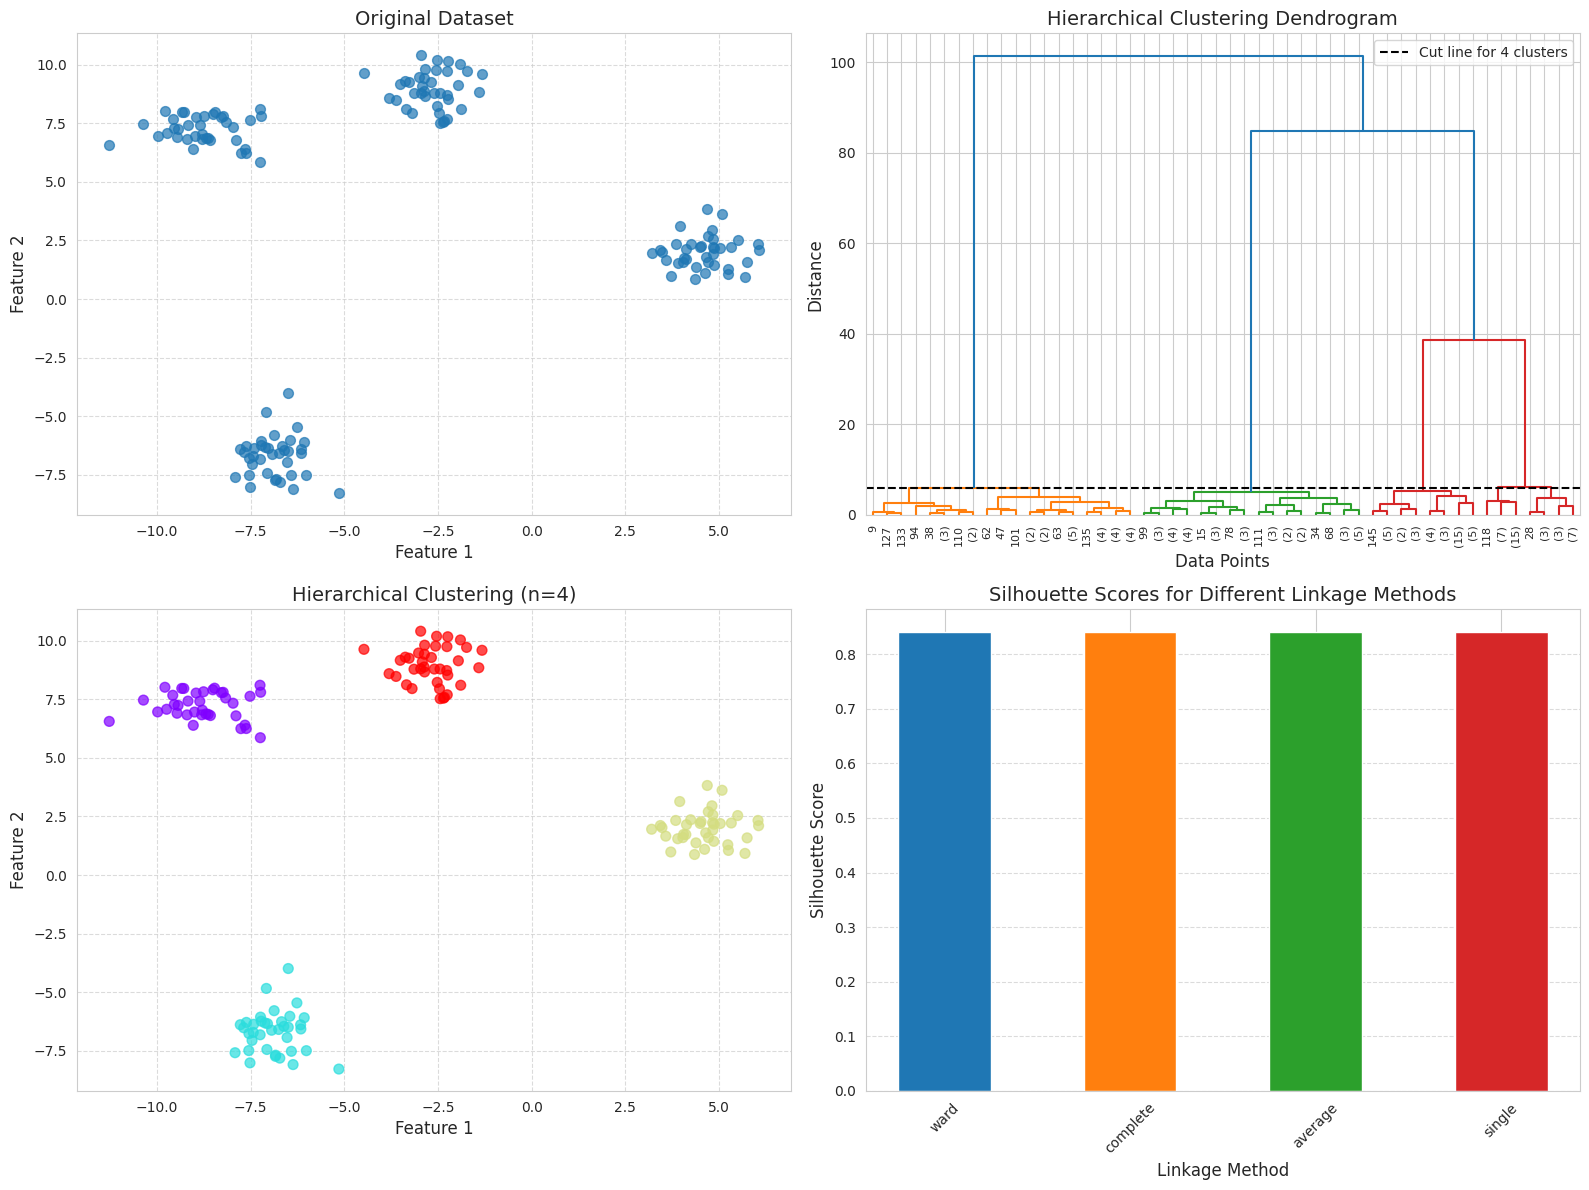

Silhouette scores for different linkage methods:
ward: 0.8399
complete: 0.8399
average: 0.8399
single: 0.8399


In [81]:
# Set random seed for reproducibility
np.random.seed(42)
plt.figure(figsize=(16, 12))

# Generate synthetic clustered data
X, y_true = make_blobs(n_samples=150, centers=4, cluster_std=0.75, random_state=42)

# Plot original data
plt.subplot(2, 2, 1)
plt.scatter(X[:, 0], X[:, 1], s=50, alpha=0.7)
plt.title('Original Dataset', fontsize=14)
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Create linkage matrix for hierarchical clustering
Z = linkage(X, method='ward')

# Plot the dendrogram
plt.subplot(2, 2, 2)
dendrogram(Z, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram', fontsize=14)
plt.xlabel('Data Points', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.axhline(y=6, c='k', linestyle='--', label='Cut line for 4 clusters')
plt.legend()

# Apply hierarchical clustering
n_clusters = 4  # Based on dendrogram analysis
hierarch_cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
cluster_labels = hierarch_cluster.fit_predict(X)

# Visualize the clustering results
plt.subplot(2, 2, 3)
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, s=50, cmap='rainbow', alpha=0.7)
plt.title(f'Hierarchical Clustering (n={n_clusters})', fontsize=14)
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Compare different linkage methods
linkage_methods = ['ward', 'complete', 'average', 'single']
scores = []

plt.subplot(2, 2, 4)
for i, method in enumerate(linkage_methods):
    hierarch_cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage=method)
    labels = hierarch_cluster.fit_predict(X)
    score = silhouette_score(X, labels)
    scores.append(score)

    plt.bar(i, score, width=0.5, label=method)

plt.title('Silhouette Scores for Different Linkage Methods', fontsize=14)
plt.xlabel('Linkage Method', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.xticks(range(len(linkage_methods)), linkage_methods, rotation=45)
plt.grid(True, linestyle='--', alpha=0.7, axis='y')

plt.tight_layout()
plt.show()

print("Silhouette scores for different linkage methods:")
for method, score in zip(linkage_methods, scores):
    print(f"{method}: {score:.4f}")

#### 2.2.3. DBSCAN

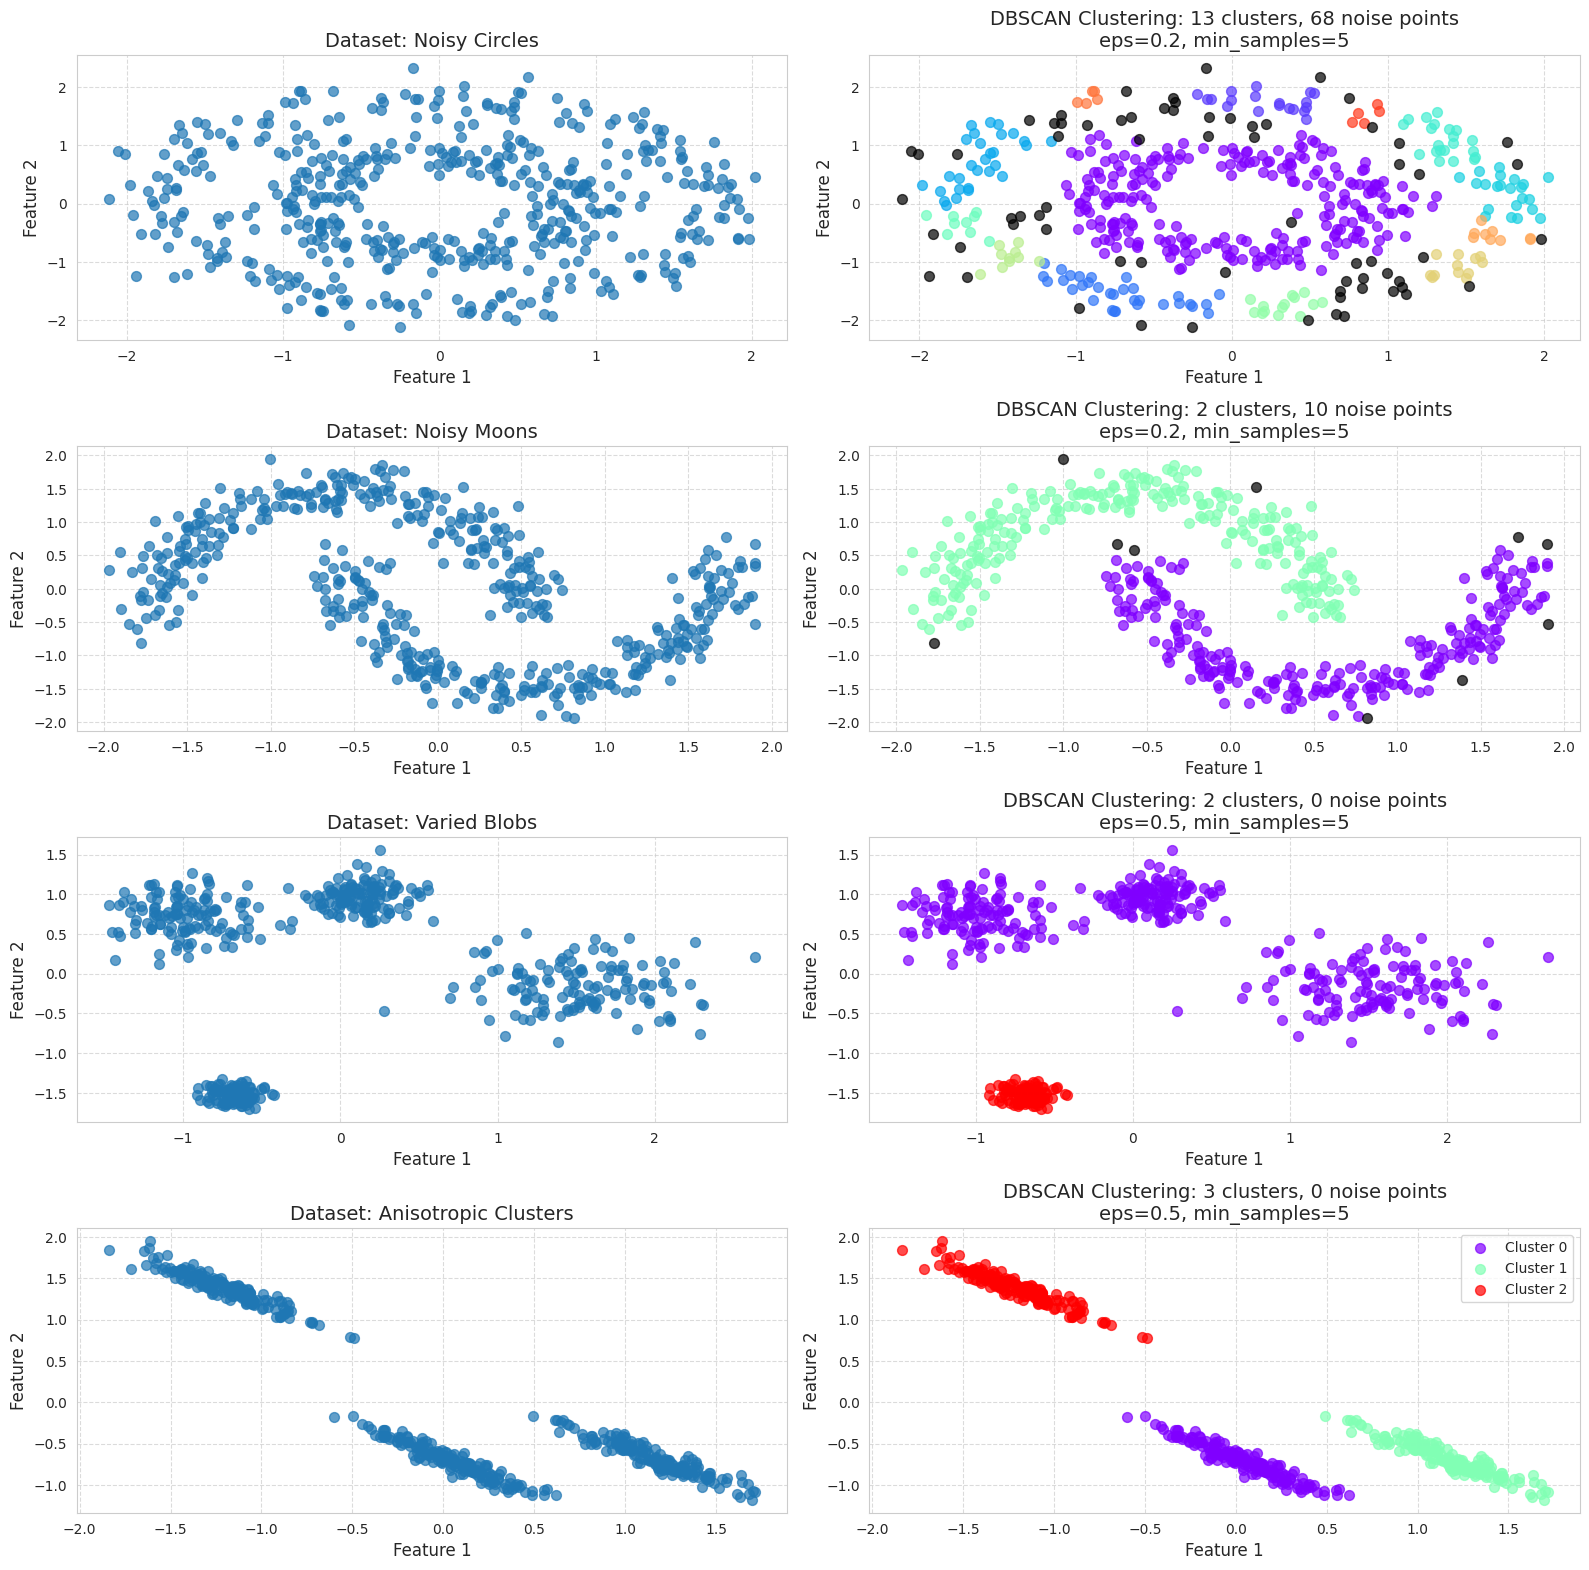

In [82]:
# Create figure
plt.figure(figsize=(16, 16))

# Generate different datasets
# 1. Noisy circles
X1, y1 = make_circles(n_samples=500, factor=0.5, noise=0.1, random_state=42)

# 2. Noisy moons
X2, y2 = make_moons(n_samples=500, noise=0.1, random_state=42)

# 3. Blobs with varied variances
X3, y3 = make_blobs(n_samples=500, centers=4, cluster_std=[1.0, 2.0, 0.5, 1.5], random_state=42)

# 4. Anisotropic clusters (stretched)
X4, _ = make_blobs(n_samples=500, centers=3, random_state=42)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X4 = np.dot(X4, transformation)

# Standardize all datasets
datasets = [
    (StandardScaler().fit_transform(X1), "Noisy Circles"),
    (StandardScaler().fit_transform(X2), "Noisy Moons"),
    (StandardScaler().fit_transform(X3), "Varied Blobs"),
    (StandardScaler().fit_transform(X4), "Anisotropic Clusters")
]

# DBSCAN parameters for different datasets
params = [(0.2, 5), (0.2, 5), (0.5, 5), (0.5, 5)]

# Plot the datasets and DBSCAN clustering results
for i, ((X, name), (eps, min_samples)) in enumerate(zip(datasets, params)):
    # DBSCAN clustering
    db = DBSCAN(eps=eps, min_samples=min_samples)
    labels = db.fit_predict(X)

    # Number of clusters and noise points
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    # Original data
    plt.subplot(4, 2, 2*i+1)
    plt.scatter(X[:, 0], X[:, 1], s=50, alpha=0.7)
    plt.title(f'Dataset: {name}', fontsize=14)
    plt.xlabel('Feature 1', fontsize=12)
    plt.ylabel('Feature 2', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)

    # DBSCAN results
    plt.subplot(4, 2, 2*i+2)
    unique_labels = set(labels)
    colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))

    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)
        xy = X[class_member_mask]
        plt.scatter(xy[:, 0], xy[:, 1], s=50, alpha=0.7, color=col,
                   label=f'Cluster {k}' if k != -1 else 'Noise')

    plt.title(f'DBSCAN Clustering: {n_clusters} clusters, {n_noise} noise points\neps={eps}, min_samples={min_samples}',
             fontsize=14)
    plt.xlabel('Feature 1', fontsize=12)
    plt.ylabel('Feature 2', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)

    # Only add legend for the last plot to avoid overcrowding
    if i == len(datasets) - 1:
        plt.legend(loc='upper right')

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

#### 2.2.4. Gaussian Mixture Models (GMM)

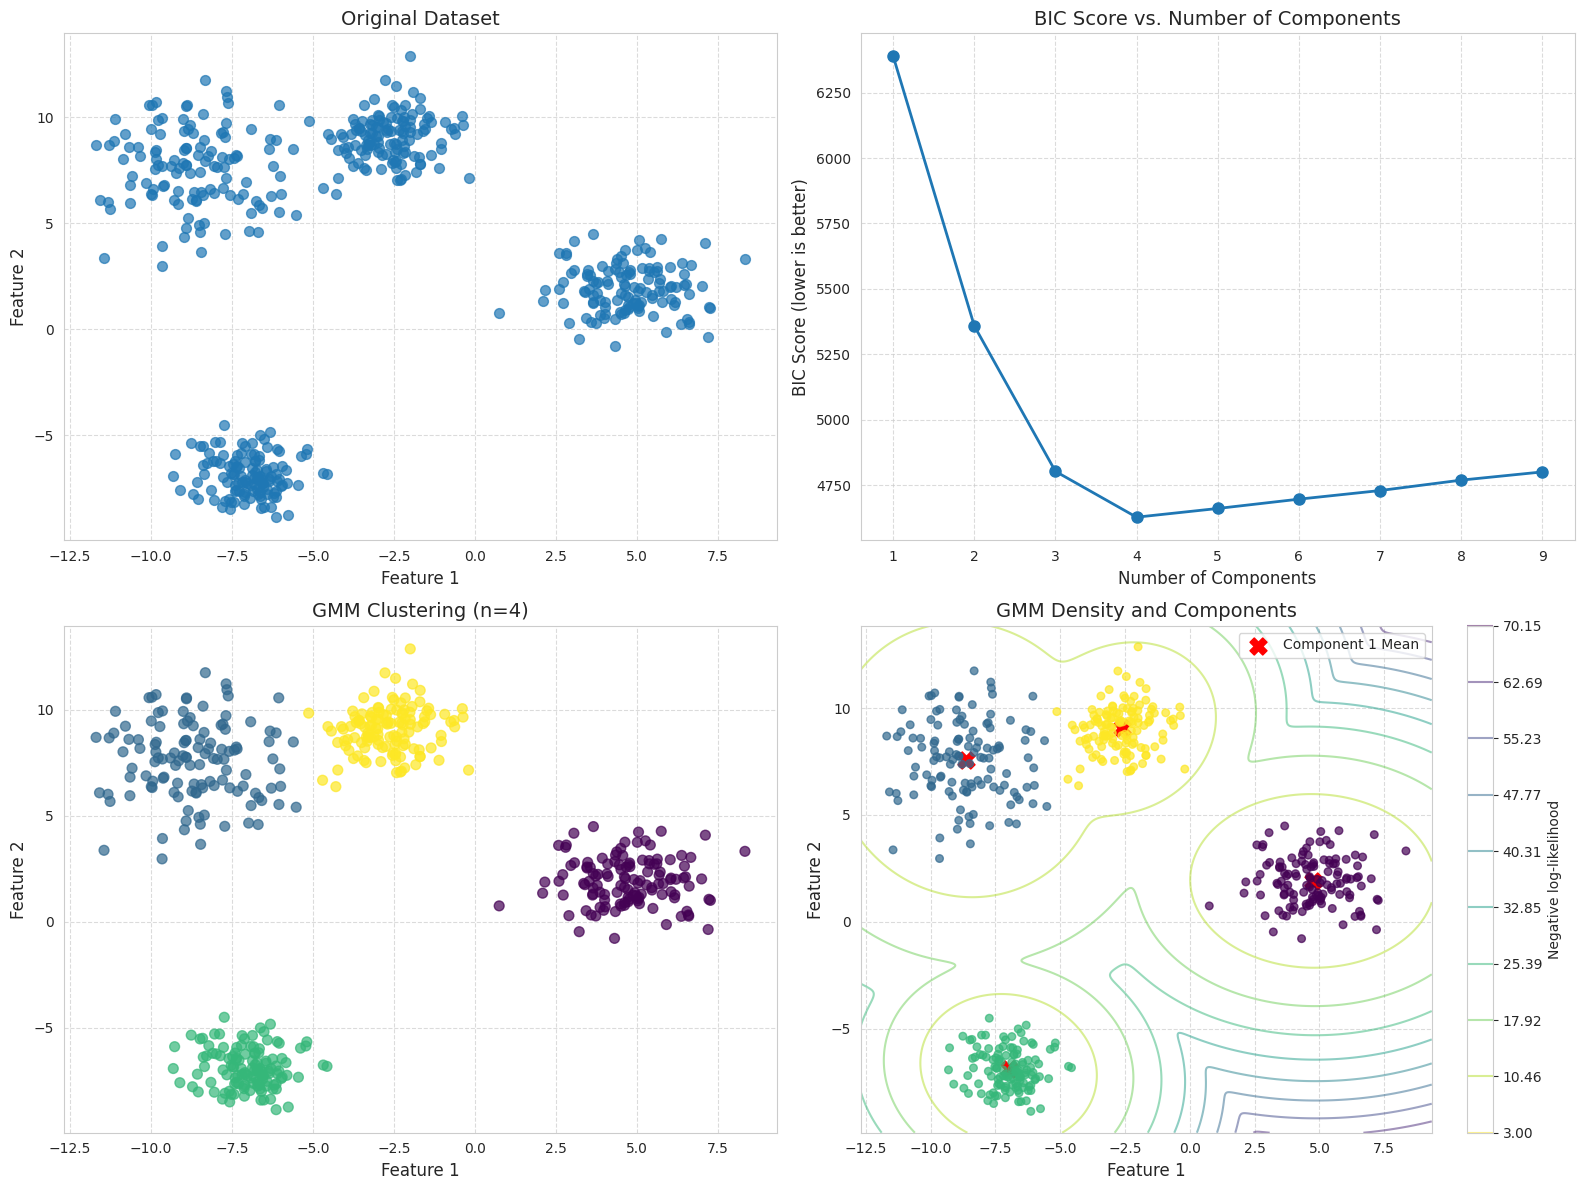

Optimal number of components found: 4
BIC score: 4627.8919


In [75]:
# Set random seed for reproducibility
np.random.seed(42)
plt.figure(figsize=(16, 12))

# Generate synthetic data with overlapping clusters
X, y_true = make_blobs(n_samples=500, centers=4, cluster_std=[1.0, 1.2, 0.9, 1.8], random_state=42)

# Plot original data
plt.subplot(2, 2, 1)
plt.scatter(X[:, 0], X[:, 1], s=50, alpha=0.7)
plt.title('Original Dataset', fontsize=14)
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Determine optimal number of components using BIC
bic_scores = []
n_components_range = range(1, 10)

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=42)
    gmm.fit(X)
    bic_scores.append(gmm.bic(X))

# Plot BIC scores
plt.subplot(2, 2, 2)
plt.plot(n_components_range, bic_scores, 'o-', linewidth=2, markersize=8)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('BIC Score (lower is better)', fontsize=12)
plt.title('BIC Score vs. Number of Components', fontsize=14)

# Fit GMM with optimal number of components
optimal_n = n_components_range[np.argmin(bic_scores)]
gmm = GaussianMixture(n_components=optimal_n, covariance_type='full', random_state=42)
gmm.fit(X)
labels = gmm.predict(X)

# Plot cluster assignments
plt.subplot(2, 2, 3)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis', alpha=0.7)
plt.title(f'GMM Clustering (n={optimal_n})', fontsize=14)
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Visualize the Gaussian components
plt.subplot(2, 2, 4)

# Create a mesh grid
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Calculate the GMM probability density
Z = -gmm.score_samples(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the probability density contours
CS = plt.contour(xx, yy, Z, levels=np.linspace(Z.min(), Z.max(), 10), cmap='viridis_r', alpha=0.5)
plt.colorbar(CS, label='Negative log-likelihood')

# Highlight the means and covariances of each Gaussian component
for i, (mean, covar) in enumerate(zip(gmm.means_, gmm.covariances_)):
    # Draw an ellipse for each component
    v, w = np.linalg.eigh(covar)
    u = w[0] / np.linalg.norm(w[0])
    angle = np.arctan2(u[1], u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    v = 2. * np.sqrt(2.) * np.sqrt(v)

    # 2-sigma ellipse
    plt.scatter(mean[0], mean[1], c='red', s=150, marker='X',
               label=f'Component {i+1} Mean' if i == 0 else "")

    # Plot ellipses
    #from matplotlib.patches import Ellipse
    #ell = Ellipse(mean, v[0], v[1], 180 + angle, fill=False, edgecolor='black', linewidth=2)
    #plt.gca().add_patch(ell)

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=labels, s=30, cmap='viridis', alpha=0.7)
plt.title('GMM Density and Components', fontsize=14)
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

print(f"Optimal number of components found: {optimal_n}")
print(f"BIC score: {min(bic_scores):.4f}")

### 2.2. Dimensionnaly Reduction Methods

#### 2.2.2.1. Principal Component Analysis (PCA)

Number of components for 90% variance: 31


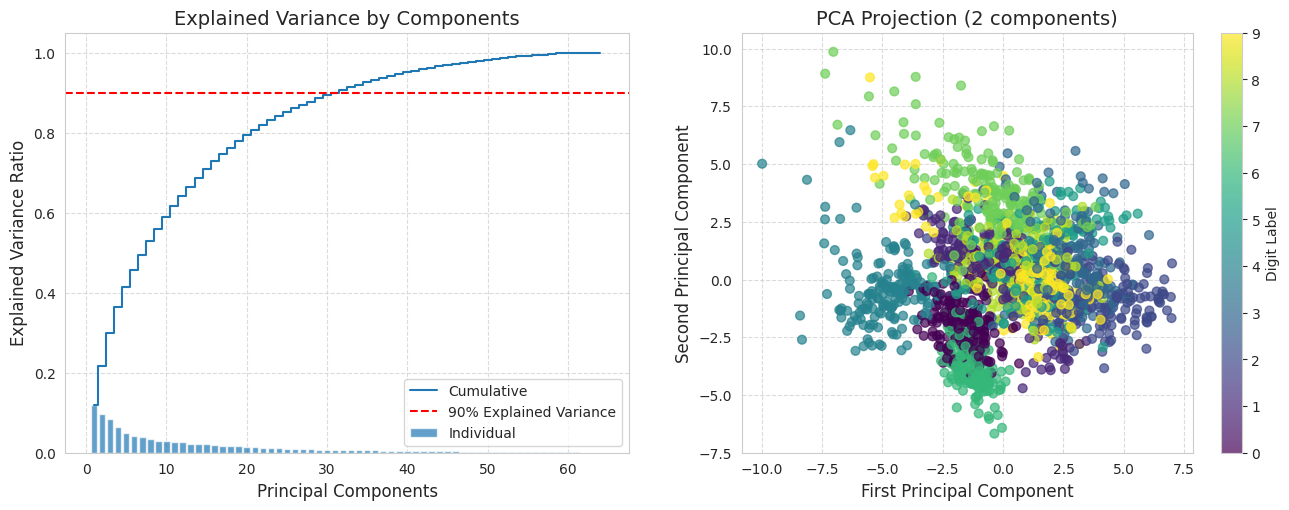

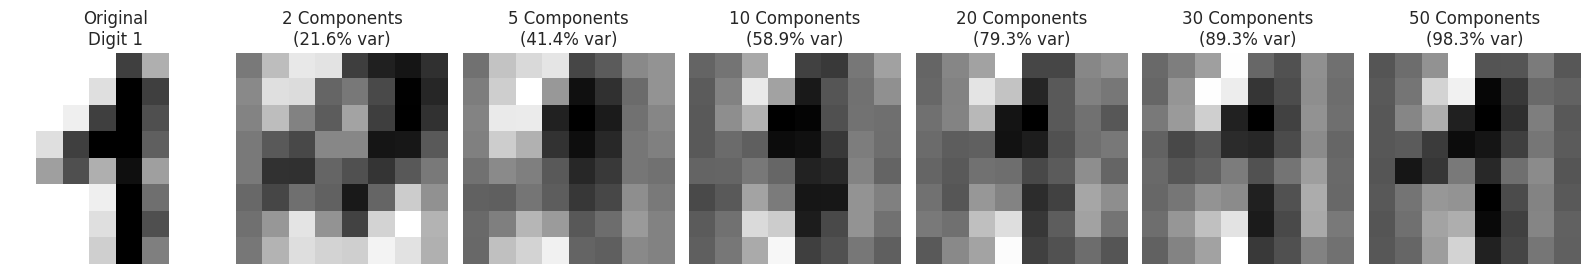

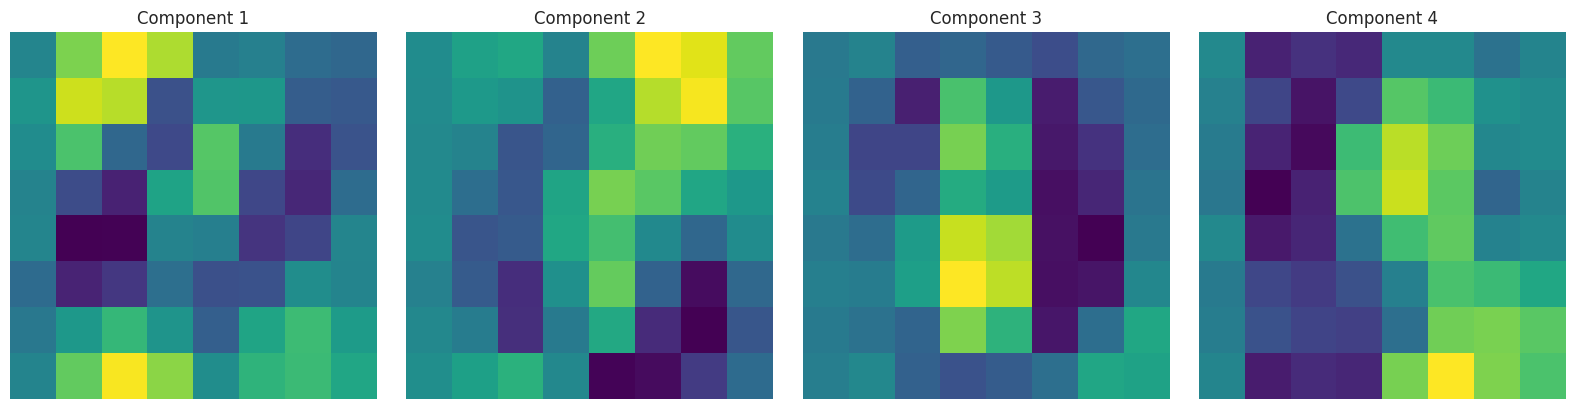

In [76]:
# Load the MNIST digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Standardize the data
X_std = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_std)

# Create figure
plt.figure(figsize=(16, 12))

# Plot explained variance ratio
plt.subplot(2, 2, 1)
explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)
plt.bar(range(1, len(explained_var) + 1), explained_var, alpha=0.7, label='Individual')
plt.step(range(1, len(cumulative_var) + 1), cumulative_var, where='mid', label='Cumulative')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Explained Variance')
plt.xlabel('Principal Components', fontsize=12)
plt.ylabel('Explained Variance Ratio', fontsize=12)
plt.title('Explained Variance by Components', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Find the number of components needed for 90% variance
n_components_90 = np.argmax(cumulative_var >= 0.9) + 1
print(f"Number of components for 90% variance: {n_components_90}")

# Plot 2D projection
plt.subplot(2, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7, s=40)
plt.colorbar(label='Digit Label')
plt.xlabel('First Principal Component', fontsize=12)
plt.ylabel('Second Principal Component', fontsize=12)
plt.title('PCA Projection (2 components)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Choose a sample digit
sample_idx = 42
sample_digit = X[sample_idx].reshape(8, 8)

# Create PCA with different numbers of components
n_components_list = [2, 5, 10, 20, 30, 50]
reconstructed_digits = []

for n in n_components_list:
    pca_n = PCA(n_components=n)
    X_transformed = pca_n.fit_transform(X_std)
    X_reconstructed = pca_n.inverse_transform(X_transformed)
    digit_reconstructed = X_reconstructed[sample_idx].reshape(8, 8)
    reconstructed_digits.append(digit_reconstructed)

# Plot original and reconstructed digits
plt.figure(figsize=(16, 8))
plt.subplot(1, len(n_components_list) + 1, 1)
plt.imshow(sample_digit, cmap='binary')
plt.title(f'Original\nDigit {y[sample_idx]}', fontsize=12)
plt.axis('off')

for i, (n, digit) in enumerate(zip(n_components_list, reconstructed_digits)):
    plt.subplot(1, len(n_components_list) + 1, i + 2)
    plt.imshow(digit, cmap='binary')
    plt.title(f'{n} Components\n({np.sum(explained_var[:n])*100:.1f}% var)', fontsize=12)
    plt.axis('off')

plt.tight_layout()
plt.show()

# Examine component weights
plt.figure(figsize=(16, 4))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    component = pca.components_[i].reshape(8, 8)
    plt.imshow(component, cmap='viridis')
    plt.title(f'Component {i+1}', fontsize=12)
    plt.axis('off')

plt.tight_layout()
plt.show()

#### 2.2.2.2. t-SNE (t-Distributed Stochastic Neighbor Embedding)

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


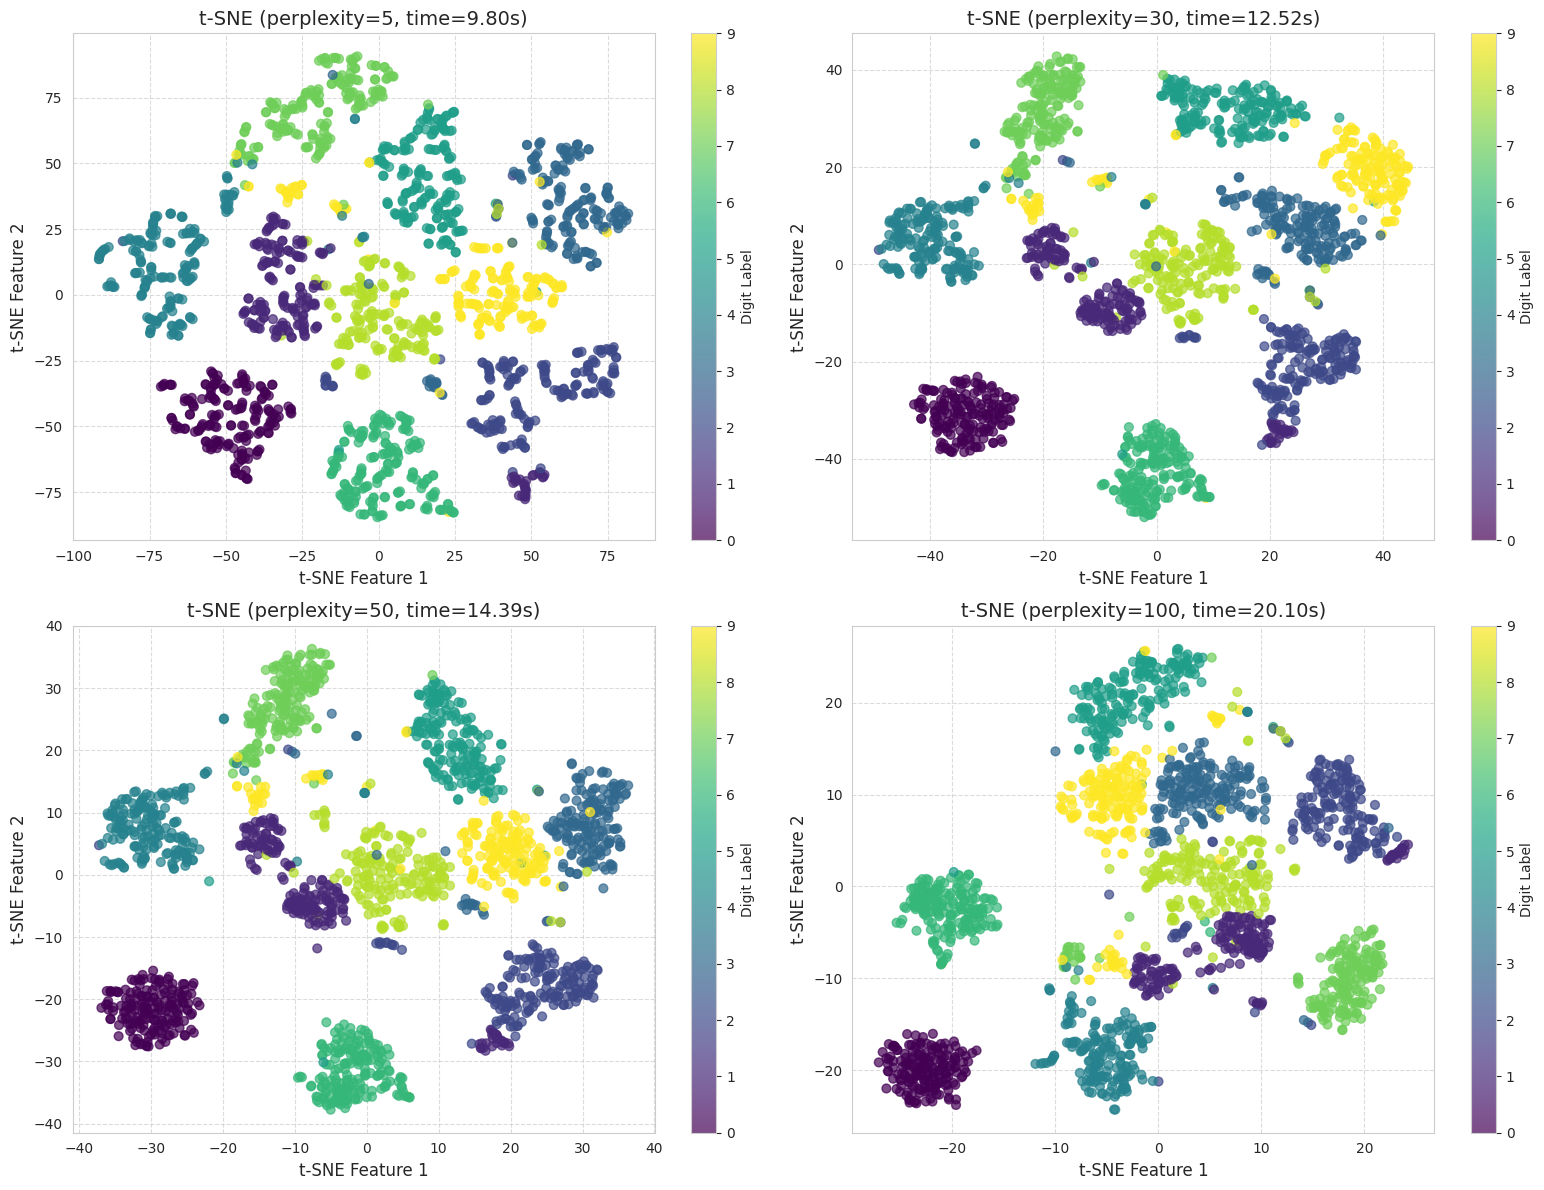

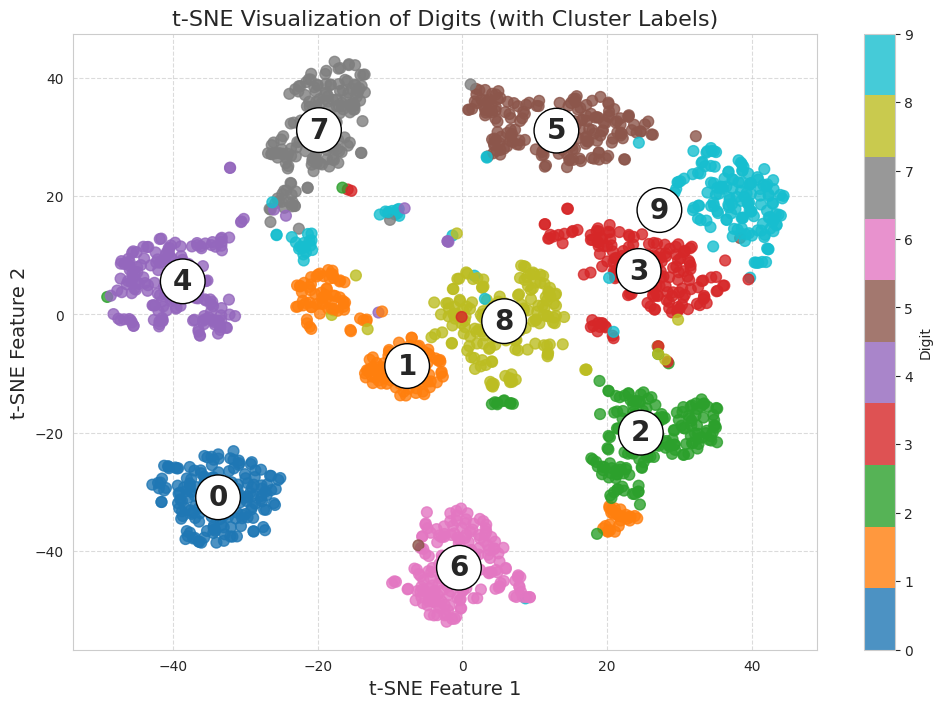

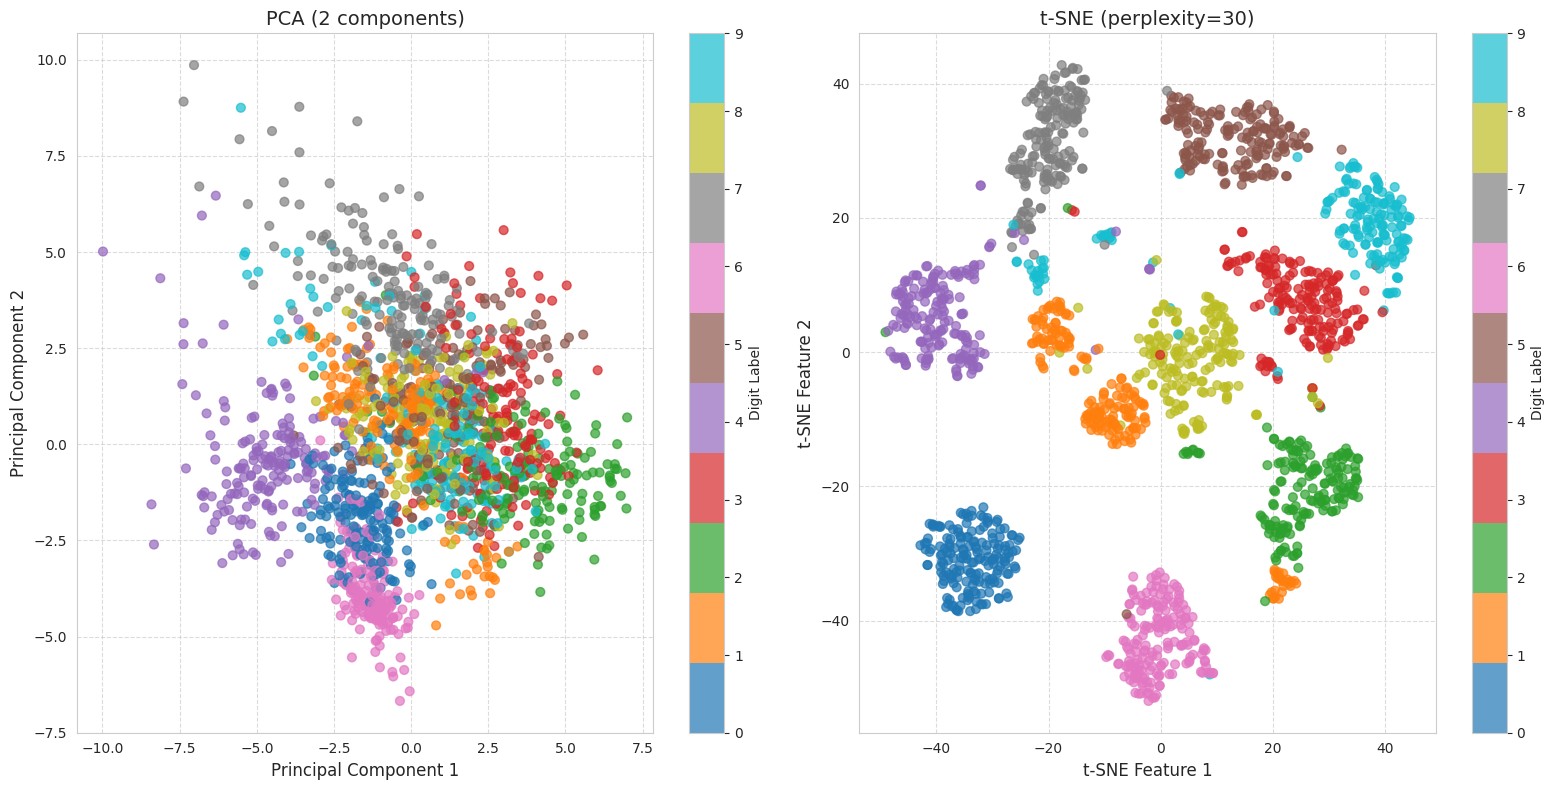

In [77]:
# Load the MNIST digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Standardize the data
X_std = StandardScaler().fit_transform(X)

# Create figure
plt.figure(figsize=(16, 12))

# Apply t-SNE with different perplexity values
perplexities = [5, 30, 50, 100]
t_sne_results = {}

for i, perplexity in enumerate(perplexities):
    t0 = time.time()
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42, n_iter=1000)
    X_tsne = tsne.fit_transform(X_std)
    t1 = time.time()

    t_sne_results[perplexity] = X_tsne

    plt.subplot(2, 2, i + 1)
    scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', alpha=0.7, s=40)
    plt.colorbar(label='Digit Label')
    plt.title(f't-SNE (perplexity={perplexity}, time={t1-t0:.2f}s)', fontsize=14)
    plt.xlabel('t-SNE Feature 1', fontsize=12)
    plt.ylabel('t-SNE Feature 2', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Visualize cluster separation
best_perplexity = 30  # Typically performs well
X_tsne_best = t_sne_results[best_perplexity]

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_tsne_best[:, 0], X_tsne_best[:, 1], c=y,
                    cmap='tab10', alpha=0.8, s=60)

# Add labels for each cluster centroid
for digit in range(10):
    mask = y == digit
    x_mean = np.mean(X_tsne_best[mask, 0])
    y_mean = np.mean(X_tsne_best[mask, 1])
    plt.annotate(f'{digit}', (x_mean, y_mean), fontsize=20, fontweight='bold',
                ha='center', va='center',
                bbox=dict(boxstyle='circle', fc='white', ec='black'))

plt.title('t-SNE Visualization of Digits (with Cluster Labels)', fontsize=16)
plt.xlabel('t-SNE Feature 1', fontsize=14)
plt.ylabel('t-SNE Feature 2', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.colorbar(scatter, label='Digit')
plt.show()

# Compare with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', alpha=0.7, s=40)
plt.colorbar(label='Digit Label')
plt.title('PCA (2 components)', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
plt.scatter(X_tsne_best[:, 0], X_tsne_best[:, 1], c=y, cmap='tab10', alpha=0.7, s=40)
plt.colorbar(label='Digit Label')
plt.title(f't-SNE (perplexity={best_perplexity})', fontsize=14)
plt.xlabel('t-SNE Feature 1', fontsize=12)
plt.ylabel('t-SNE Feature 2', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#### 2.2.2.3. UMAP (Uniform Manifold Approximation and Projection)

In [88]:
# import UMAP
try:
    from umap.umap_ import UMAP
    umap_available = True
except ImportError:
    print("UMAP is not installed. To install it, run: pip install umap-learn")
    umap_available = False
    # We'll continue with the example, assuming UMAP will be installed

# Import adjusted_rand_score
from sklearn.metrics import adjusted_rand_score

In [89]:
from sklearn.datasets import fetch_openml
# Load MNIST dataset (using a smaller sample for faster computation)
print("Loading MNIST dataset...")
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False, parser='auto')
X = X[:5000]  # Use 5000 samples for demonstration
y = y[:5000]
print(f"Dataset shape: {X.shape}")

# Standardize the data
print("Standardizing data...")
X_scaled = StandardScaler().fit_transform(X)

Loading MNIST dataset...
Dataset shape: (5000, 784)
Standardizing data...


In [91]:
# Function to compute embedding difference when perturbing a feature
def compute_feature_importance(X_scaled, baseline_embedding, reducer):
      feature_importance = []
      n_samples = 100  # Use a subset of samples for efficiency
      sampled_indices = np.random.choice(X_scaled.shape[0], n_samples, replace=False)
      X_sample = X_scaled[sampled_indices]

      for feature_idx in range(0, X_scaled.shape[1], 28):  # Skip every 28 pixels (1 row)
          print(f"Processing feature {feature_idx}/{X_scaled.shape[1]}", end="\r")

          # Permute this feature across the dataset
          X_permuted = X_sample.copy()
          X_permuted[:, feature_idx] = np.random.permutation(X_permuted[:, feature_idx])

          # Get embedding with permuted feature
          permuted_embedding = reducer.transform(X_permuted)

          # Compare with baseline embedding
          baseline_sample = baseline_embedding[sampled_indices]
          embedding_diff = np.mean(np.linalg.norm(permuted_embedding - baseline_sample, axis=1))
          feature_importance.append(embedding_diff)

      return feature_importance


Applying clustering to reduced data...


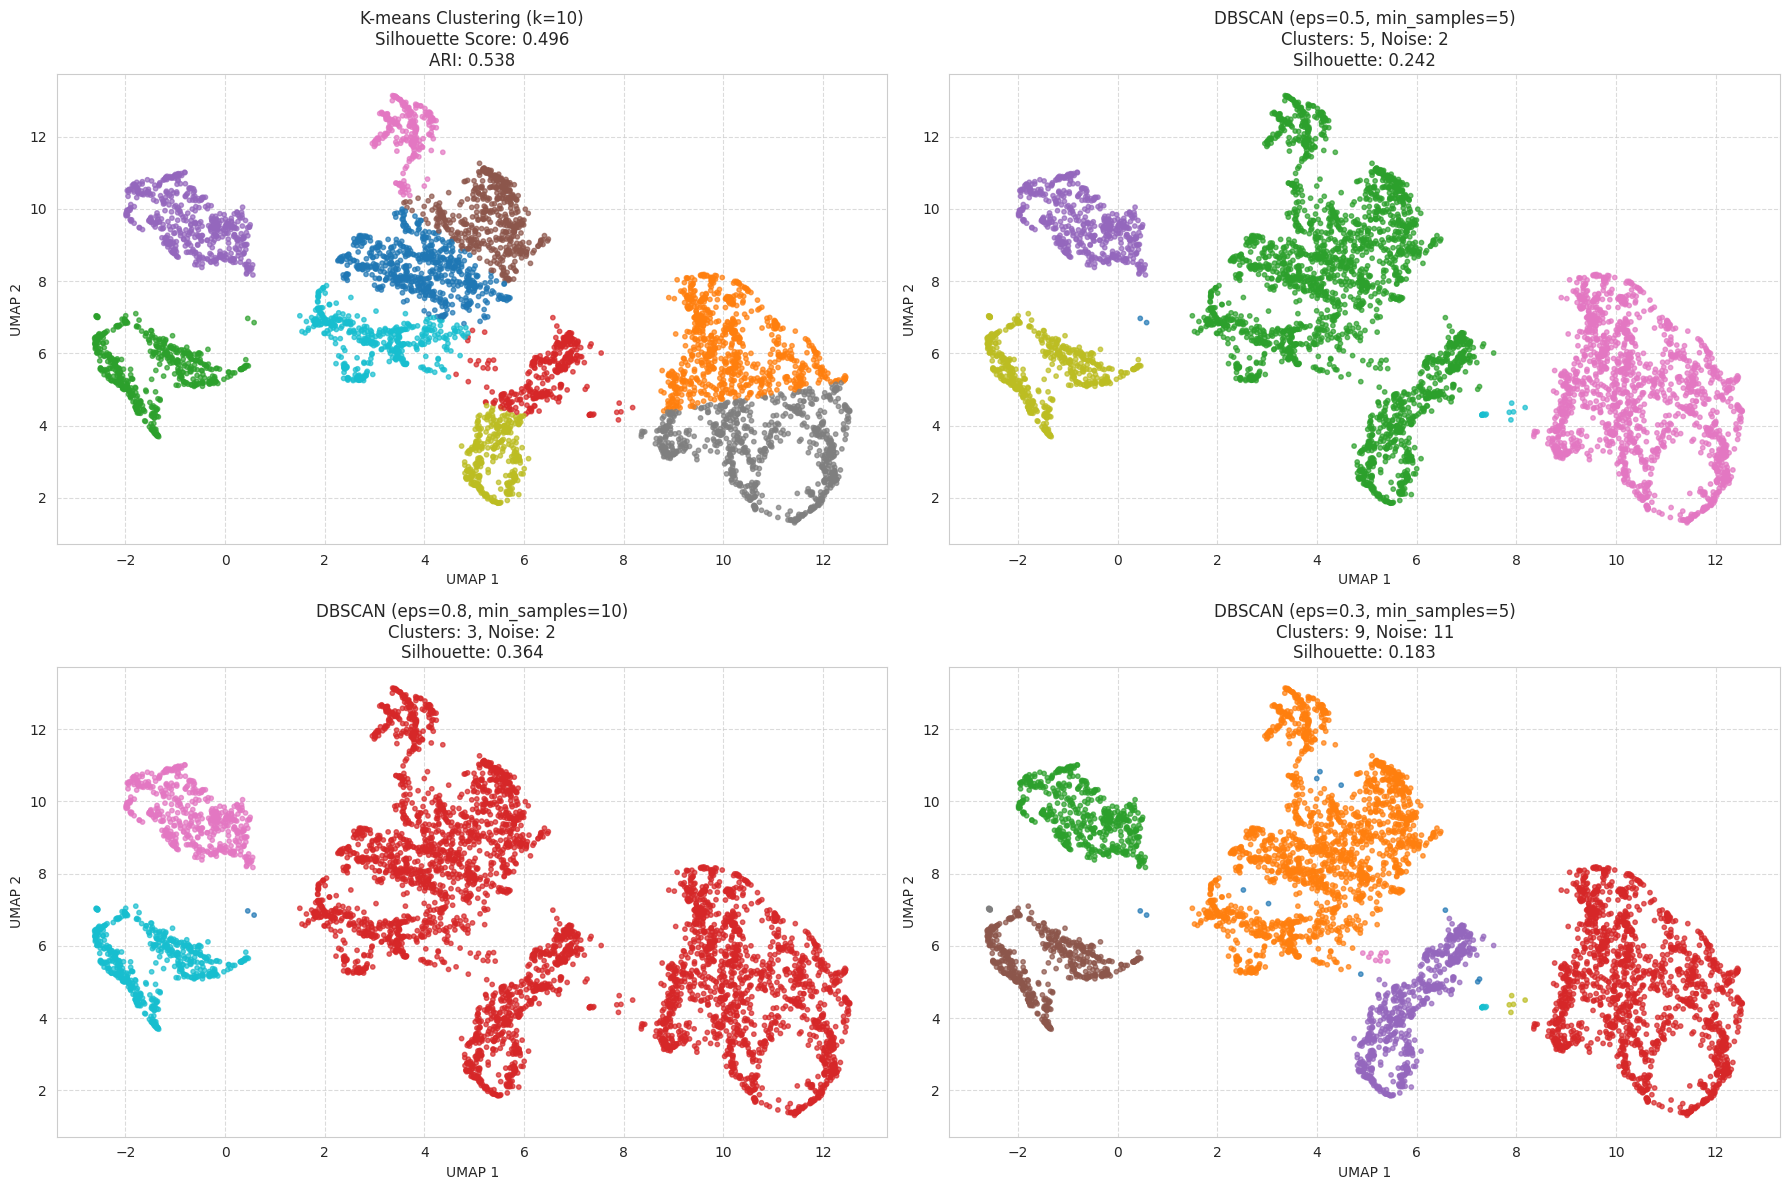

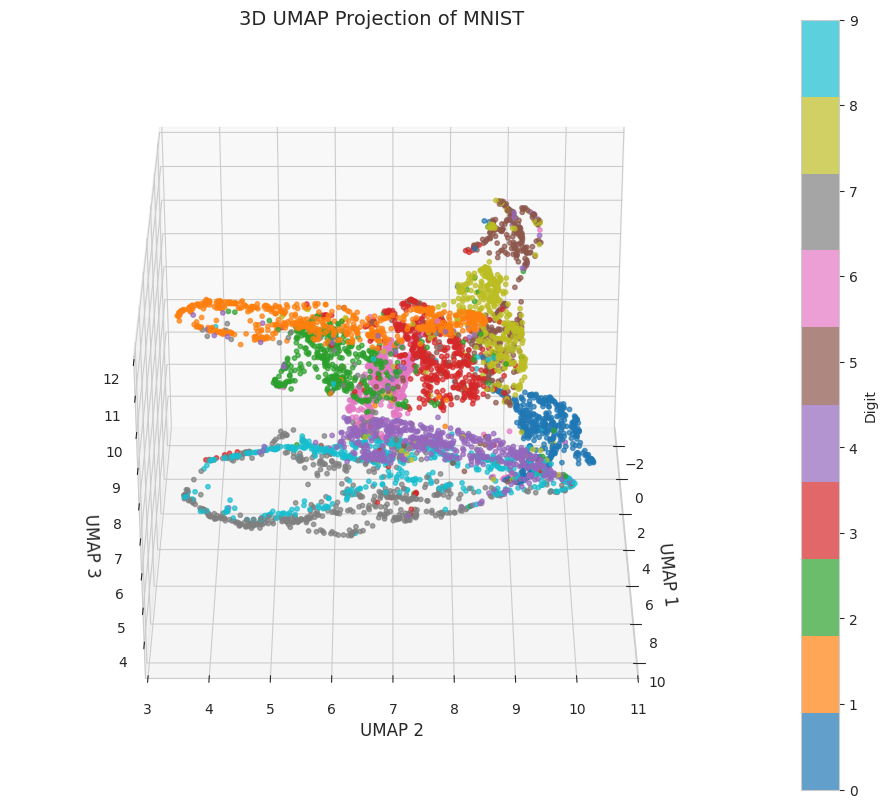

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

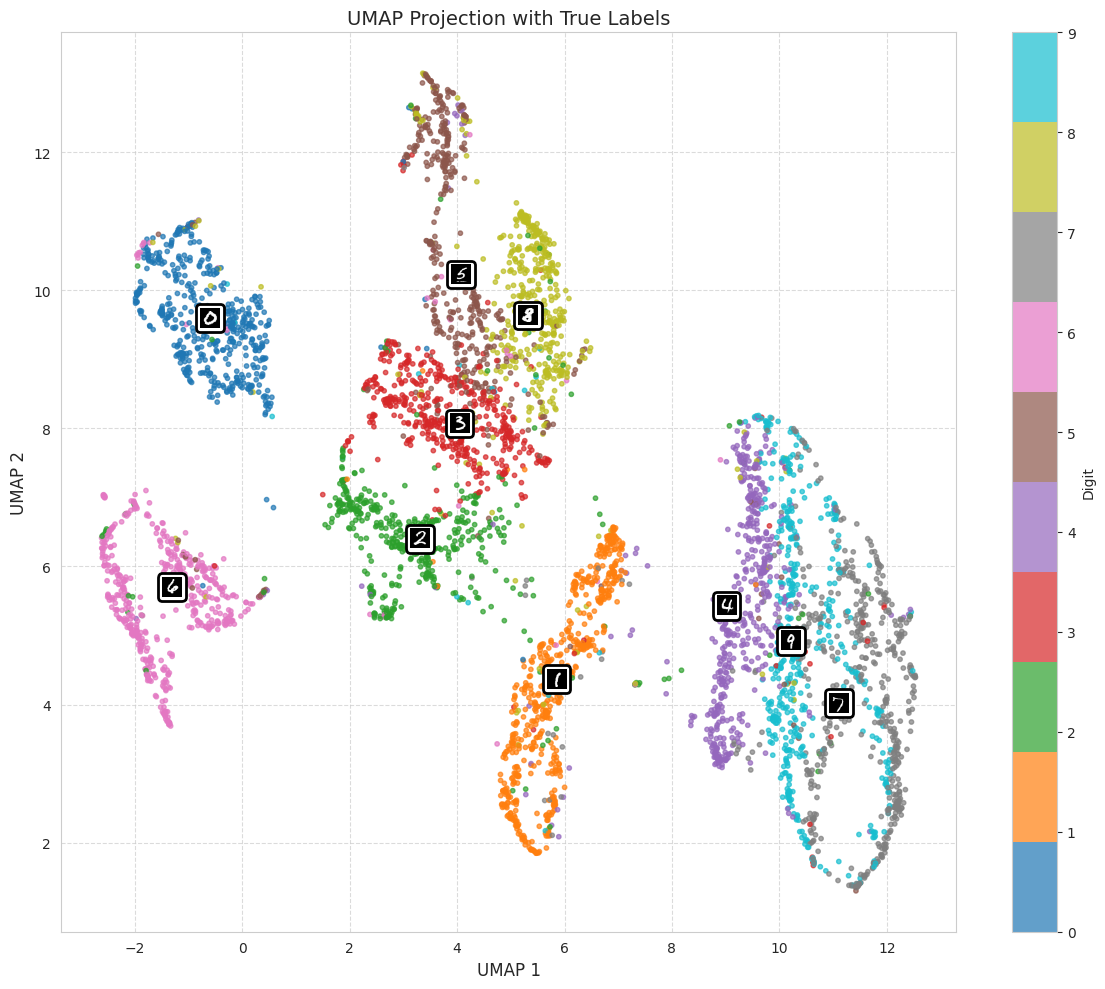


Analyzing feature importance for UMAP projection...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [93]:
# Apply different clustering algorithms to the reduced data
print("\nApplying clustering to reduced data...")

# Create a figure for clustering results
plt.figure(figsize=(18, 12))

# 1. K-means clustering
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans_labels = kmeans.fit_predict(X_reduced)

plt.subplot(2, 2, 1)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=kmeans_labels,
           cmap='tab10', alpha=0.7, s=10)
plt.title(f"K-means Clustering (k=10)\nSilhouette Score: {silhouette_score(X_reduced, kmeans_labels):.3f}\nARI: {adjusted_rand_score(y.astype(int), kmeans_labels):.3f}",
         fontsize=12)
plt.xlabel("UMAP 1", fontsize=10)
plt.ylabel("UMAP 2", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

# 2. DBSCAN clustering with different parameters
dbscan_params = [
    {'eps': 0.5, 'min_samples': 5},
    {'eps': 0.8, 'min_samples': 10},
    {'eps': 0.3, 'min_samples': 5}
]

for i, params in enumerate(dbscan_params):
    dbscan = DBSCAN(eps=params['eps'], min_samples=params['min_samples'])
    dbscan_labels = dbscan.fit_predict(X_reduced)

    # Count clusters (excluding noise points labeled as -1)
    n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
    n_noise = list(dbscan_labels).count(-1)

    plt.subplot(2, 2, i+2)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=dbscan_labels,
               cmap='tab10', alpha=0.7, s=10)

    # For DBSCAN, don't calculate silhouette score if there are no clusters or only one cluster
    if n_clusters > 1:
        # Filter out noise points for silhouette calculation
        mask = dbscan_labels != -1
        if np.sum(mask) > n_clusters:  # Need at least n_clusters+1 samples
            sil_score = silhouette_score(X_reduced[mask], dbscan_labels[mask])
            # Format the silhouette score conditionally outside the f-string format specifier
            sil_score_str = f"{sil_score:.3f}" if not np.isnan(sil_score) else "N/A"
        else:
            sil_score_str = "N/A"
    else:
        sil_score_str = "N/A"

    plt.title(f"DBSCAN (eps={params['eps']}, min_samples={params['min_samples']})\n"
             f"Clusters: {n_clusters}, Noise: {n_noise}\n"
             f"Silhouette: {sil_score_str}", # Use the pre-formatted string here
             fontsize=12)
    plt.xlabel("UMAP 1", fontsize=10)
    plt.ylabel("UMAP 2", fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('umap_clustering.png', dpi=300, bbox_inches='tight')
plt.show()

# Visualize 3D UMAP projection for better understanding
if "3D" in umap_results:
    from mpl_toolkits.mplot3d import Axes3D

    X_reduced_3d = umap_results["3D"]

    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')

    scatter = ax.scatter(X_reduced_3d[:, 0], X_reduced_3d[:, 1], X_reduced_3d[:, 2],
                       c=y.astype(int), cmap='tab10', alpha=0.7, s=10)

    plt.colorbar(scatter, label='Digit')
    ax.set_title("3D UMAP Projection of MNIST", fontsize=14)
    ax.set_xlabel("UMAP 1", fontsize=12)
    ax.set_ylabel("UMAP 2", fontsize=12)
    ax.set_zlabel("UMAP 3", fontsize=12)

    # Add a rotating view animation
    for angle in range(0, 360, 10):
        ax.view_init(30, angle)
        plt.draw()
        plt.pause(0.1)

    plt.savefig('umap_3d.png', dpi=300, bbox_inches='tight')
    plt.show()

# Compare UMAP embedding with original labels
plt.figure(figsize=(12, 10))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y.astype(int),
                   cmap='tab10', alpha=0.7, s=10)
plt.colorbar(scatter, label='Digit')
plt.title("UMAP Projection with True Labels", fontsize=14)
plt.xlabel("UMAP 1", fontsize=12)
plt.ylabel("UMAP 2", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Add some digit images at their respective locations
sample_indices = []
for digit in range(10):
    digit_indices = np.where(y.astype(int) == digit)[0]
    if len(digit_indices) > 0:
        # Take the index closest to the center of each digit cluster
        digit_points = X_reduced[digit_indices]
        centroid = np.mean(digit_points, axis=0)

        # Find closest point to centroid
        distances = np.linalg.norm(digit_points - centroid, axis=1)
        closest_idx = digit_indices[np.argmin(distances)]
        sample_indices.append(closest_idx)

# Display digit images at their projected positions
for idx in sample_indices:
    x, y_coord = X_reduced[idx]
    digit_image = X[idx].reshape(28, 28)

    # Create small axes for the digit image
    from matplotlib.offsetbox import OffsetImage, AnnotationBbox

    imagebox = OffsetImage(digit_image, zoom=0.5, cmap='gray')
    ab = AnnotationBbox(imagebox, (x, y_coord), frameon=True,
                       pad=0.2, bboxprops=dict(boxstyle="round,pad=0.3",
                                             fc="white", ec="black", lw=2))
    plt.gca().add_artist(ab)

plt.tight_layout()
plt.savefig('umap_with_digits.png', dpi=300, bbox_inches='tight')
plt.show()

# Feature importance analysis (which pixels contribute most to the UMAP projection)
print("\nAnalyzing feature importance for UMAP projection...")

# Create a baseline UMAP embedding
reducer = UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
baseline_embedding = reducer.fit_transform(X_scaled)

#### 2.2.2.4. Autoencoders (Deep Learning Approach)

In [94]:
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load the MNIST digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

In [95]:
# Define autoencoder architecture
def build_autoencoder(input_dim, encoding_dim):
    # Input layer
    input_layer = Input(shape=(input_dim,))

    # Encoder
    encoder = Dense(128, activation='relu')(input_layer)
    encoder = Dense(64, activation='relu')(encoder)
    encoder = Dense(encoding_dim, activation='relu')(encoder)

    # Decoder
    decoder = Dense(64, activation='relu')(encoder)
    decoder = Dense(128, activation='relu')(decoder)
    decoder = Dense(input_dim, activation='sigmoid')(decoder)

    # Autoencoder model
    autoencoder = Model(inputs=input_layer, outputs=decoder)

    # Encoder model
    encoder_model = Model(inputs=input_layer, outputs=encoder)

    return autoencoder, encoder_model

# Set parameters
input_dim = X.shape[1]
encoding_dim = 2  # For 2D visualization

# Build the autoencoder
autoencoder, encoder = build_autoencoder(input_dim, encoding_dim)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Print model summary
autoencoder.summary()

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 2)                   │             130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 64)                  │           8,256 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,474 (130.76 KB)

 Trainable params: 33,474 (130.76 KB)

 Non-trainable params: 0 (0.00 B)

In [96]:
# Train the model
history = autoencoder.fit(
    X_train, X_train,
    epochs=100,
    batch_size=32,
    shuffle=True,
    validation_data=(X_test, X_test),
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 1.1631 - val_loss: 0.8548
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9948 - val_loss: 0.8524
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9894 - val_loss: 0.8416
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9777 - val_loss: 0.8359
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9720 - val_loss: 0.8327
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9688 - val_loss: 0.8302
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.9661 - val_loss: 0.8280
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9635 - val_loss: 0.8250
Epoch 9/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.9601 - val_loss: 0.8220
Epoch 10/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.9565 - val_loss: 0.8178
Epoch 11/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.9529 - val_loss: 0.8162
Epoch 12/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 

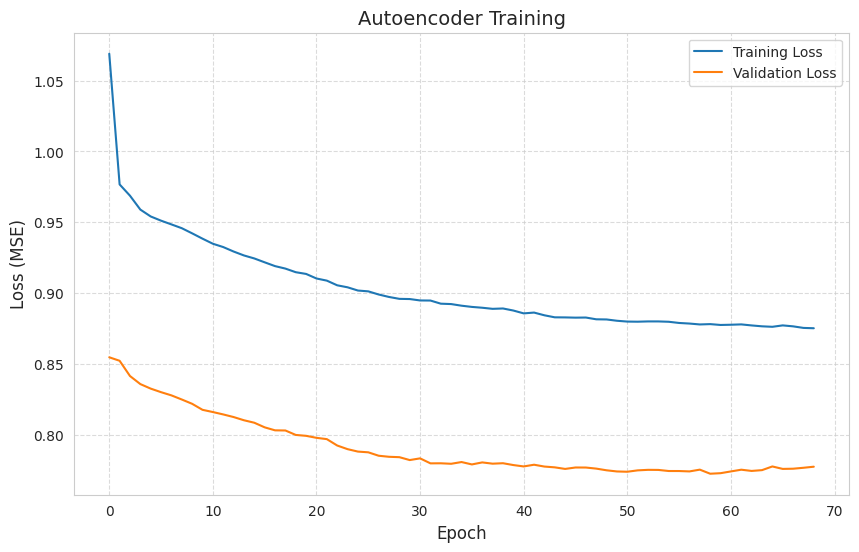

In [97]:
# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Training', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss (MSE)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


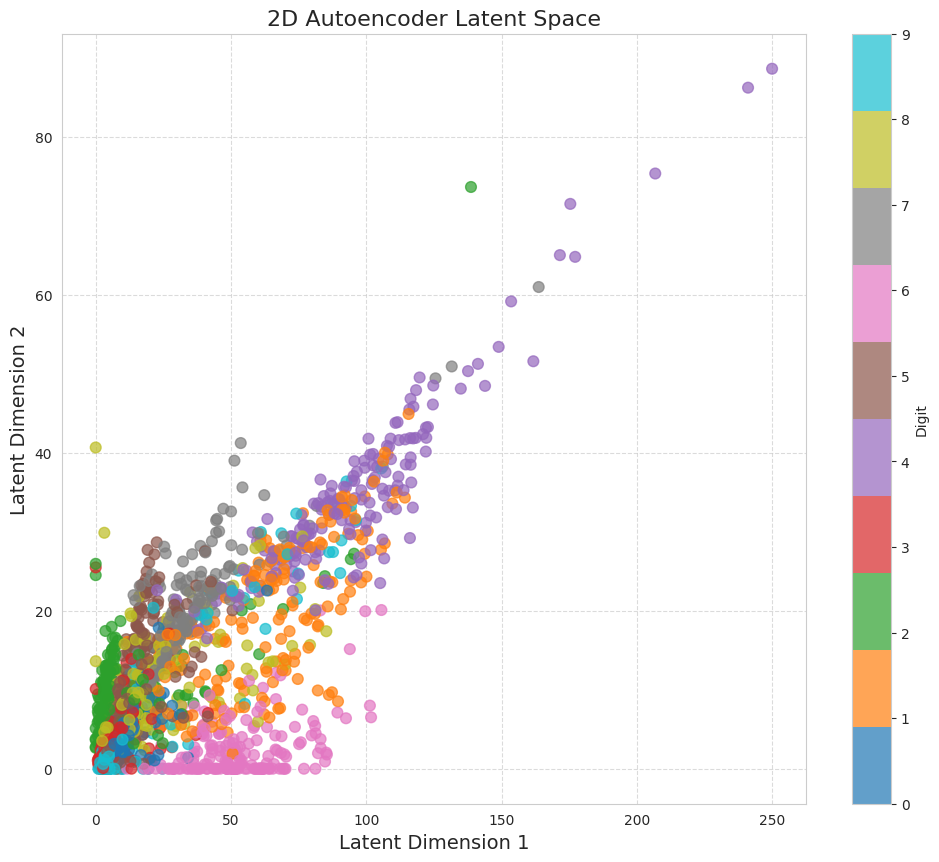

In [98]:
# Visualize the 2D encoded representation
encoded_X = encoder.predict(X_std)

plt.figure(figsize=(12, 10))
scatter = plt.scatter(encoded_X[:, 0], encoded_X[:, 1], c=y, cmap='tab10', alpha=0.7, s=60)
plt.colorbar(label='Digit')
plt.title('2D Autoencoder Latent Space', fontsize=16)
plt.xlabel('Latent Dimension 1', fontsize=14)
plt.ylabel('Latent Dimension 2', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


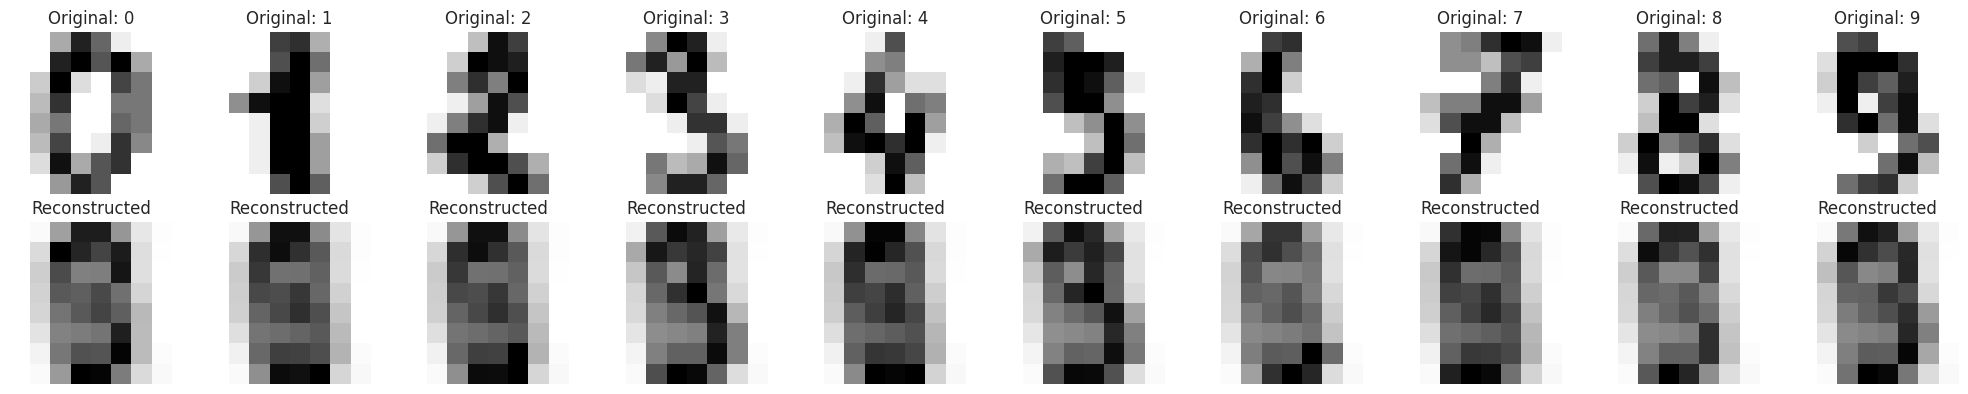

In [99]:
# Compare reconstructions of original digits
n_digits = 10
plt.figure(figsize=(20, 4))

# Get one example of each digit
example_indices = [np.where(y == i)[0][0] for i in range(n_digits)]
examples = X_std[example_indices]

# Get reconstructions
reconstructions = autoencoder.predict(examples)

# Scale back to original range
reconstructions = reconstructions * scaler.scale_ + scaler.mean_

# Plot original vs reconstructed
for i in range(n_digits):
    # Original digit
    ax = plt.subplot(2, n_digits, i + 1)
    plt.imshow(X[example_indices[i]].reshape(8, 8), cmap='binary')
    plt.title(f"Original: {y[example_indices[i]]}")
    plt.axis('off')

    # Reconstructed digit
    ax = plt.subplot(2, n_digits, i + 1 + n_digits)
    plt.imshow(reconstructions[i].reshape(8, 8), cmap='binary')
    plt.title("Reconstructed")
    plt.axis('off')

plt.tight_layout()
plt.show()

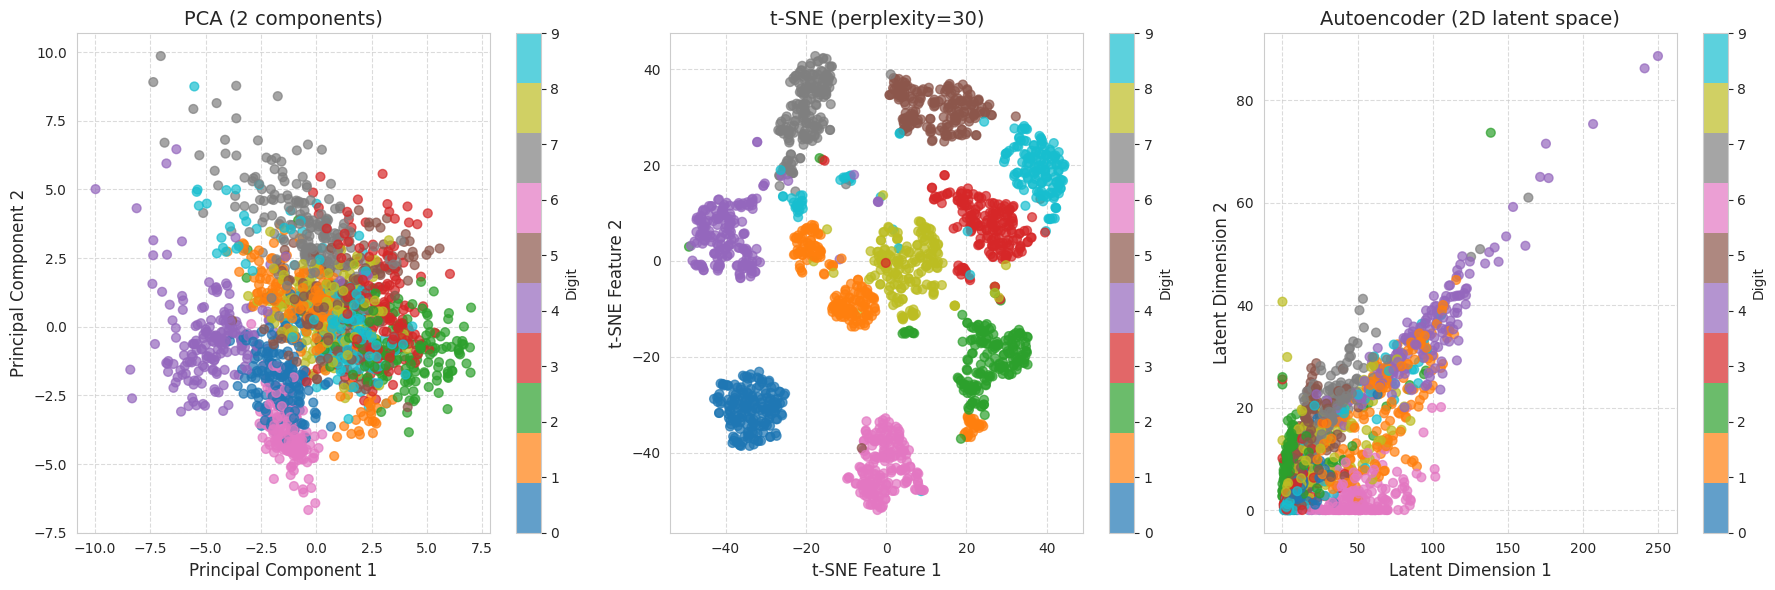

In [100]:
# Compare with PCA and t-SNE
plt.figure(figsize=(18, 6))

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

plt.subplot(1, 3, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', alpha=0.7, s=40)
plt.colorbar(label='Digit')
plt.title('PCA (2 components)', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_std)

plt.subplot(1, 3, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10', alpha=0.7, s=40)
plt.colorbar(label='Digit')
plt.title('t-SNE (perplexity=30)', fontsize=14)
plt.xlabel('t-SNE Feature 1', fontsize=12)
plt.ylabel('t-SNE Feature 2', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Autoencoder
plt.subplot(1, 3, 3)
plt.scatter(encoded_X[:, 0], encoded_X[:, 1], c=y, cmap='tab10', alpha=0.7, s=40)
plt.colorbar(label='Digit')
plt.title('Autoencoder (2D latent space)', fontsize=14)
plt.xlabel('Latent Dimension 1', fontsize=12)
plt.ylabel('Latent Dimension 2', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### 2.3. Feature Selection Methods

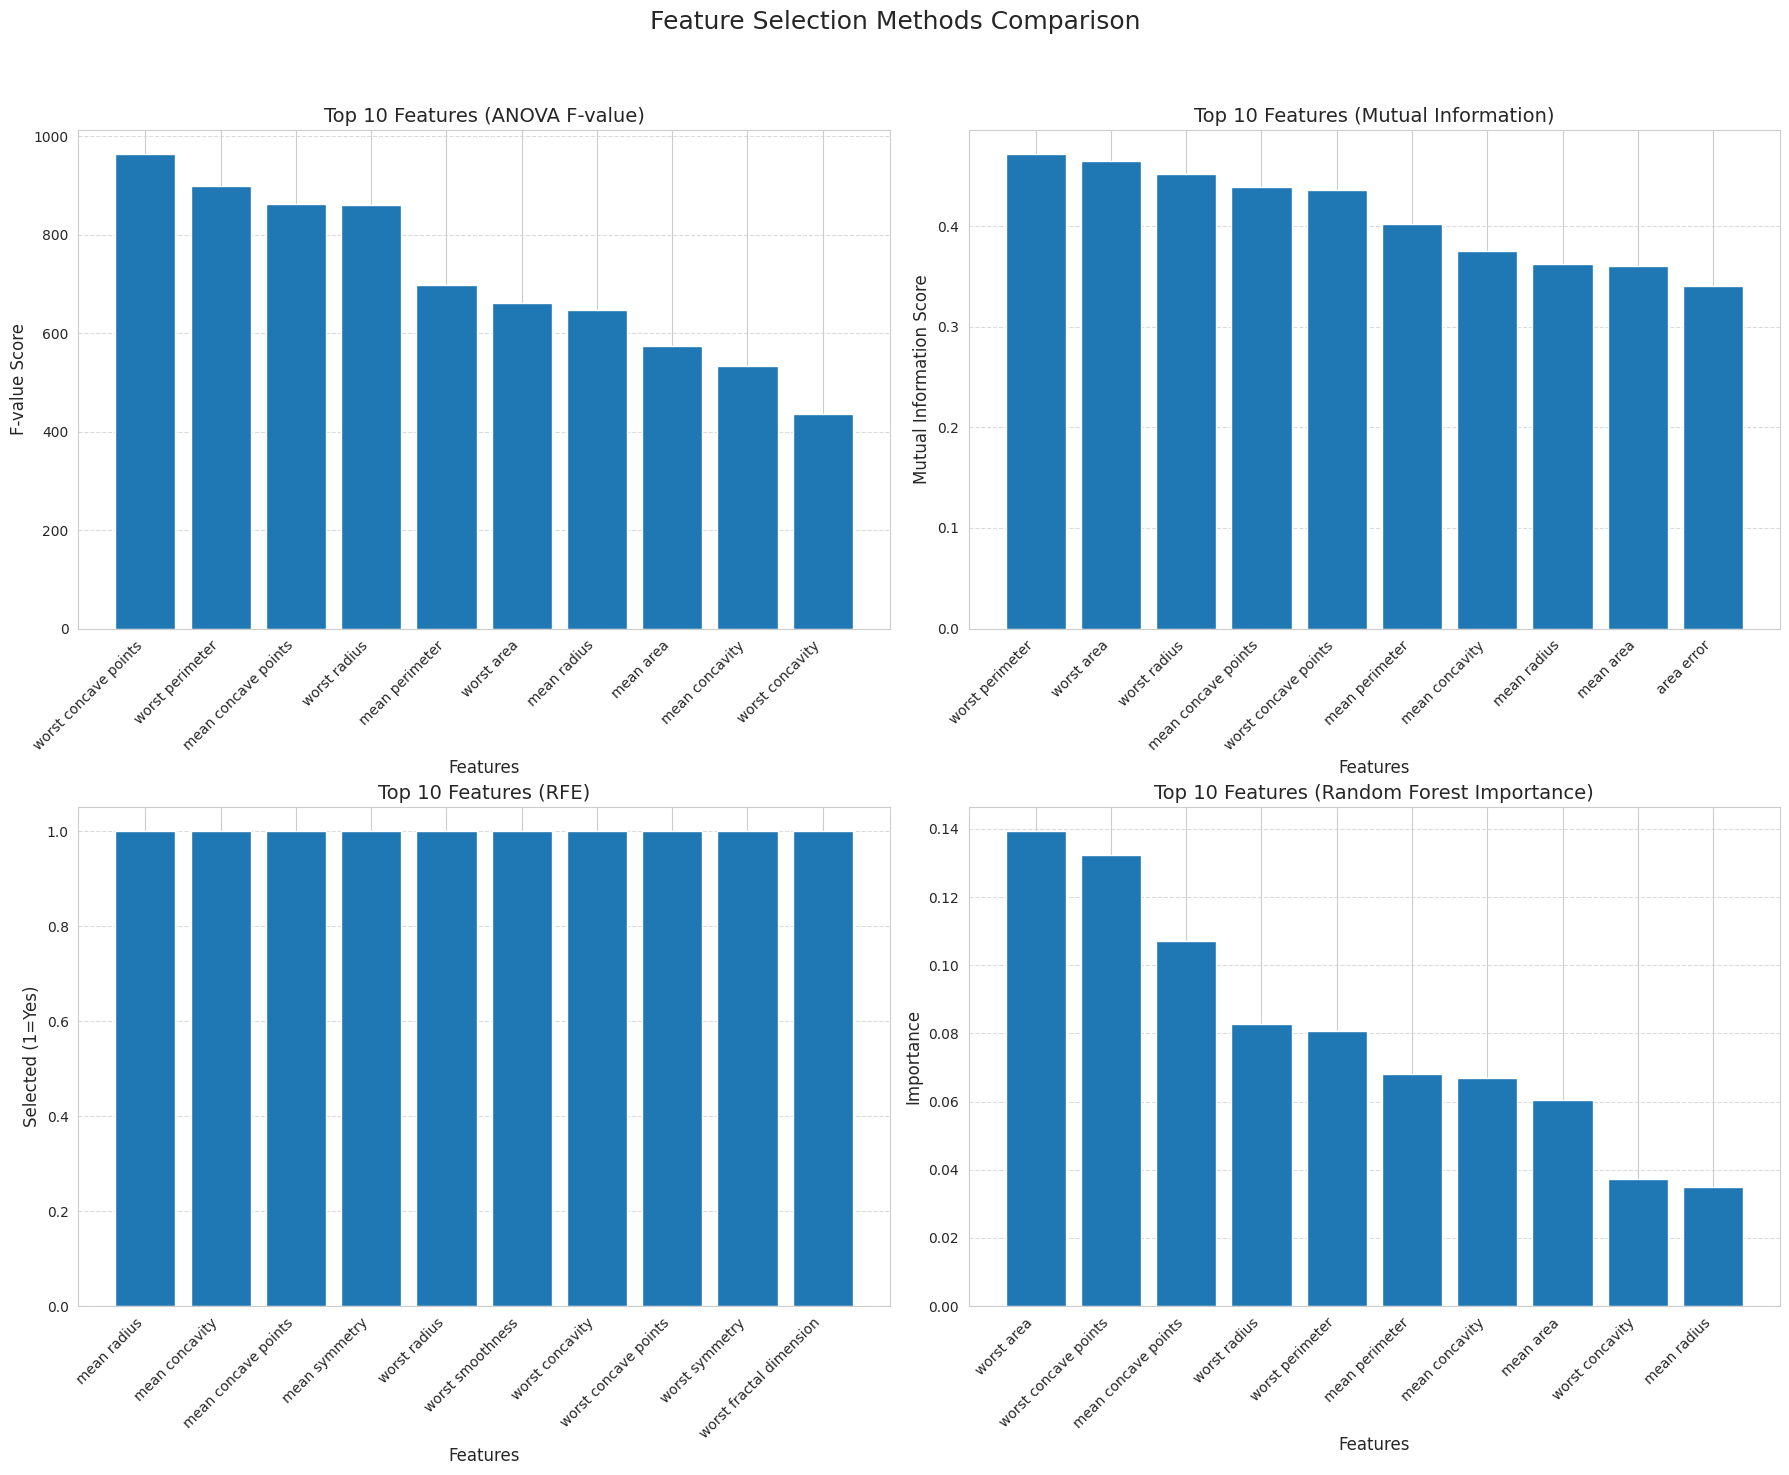

<ipython-input-101-2d0ae5c9570b>:113: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_data, labels=list(feature_selector_methods.keys()))


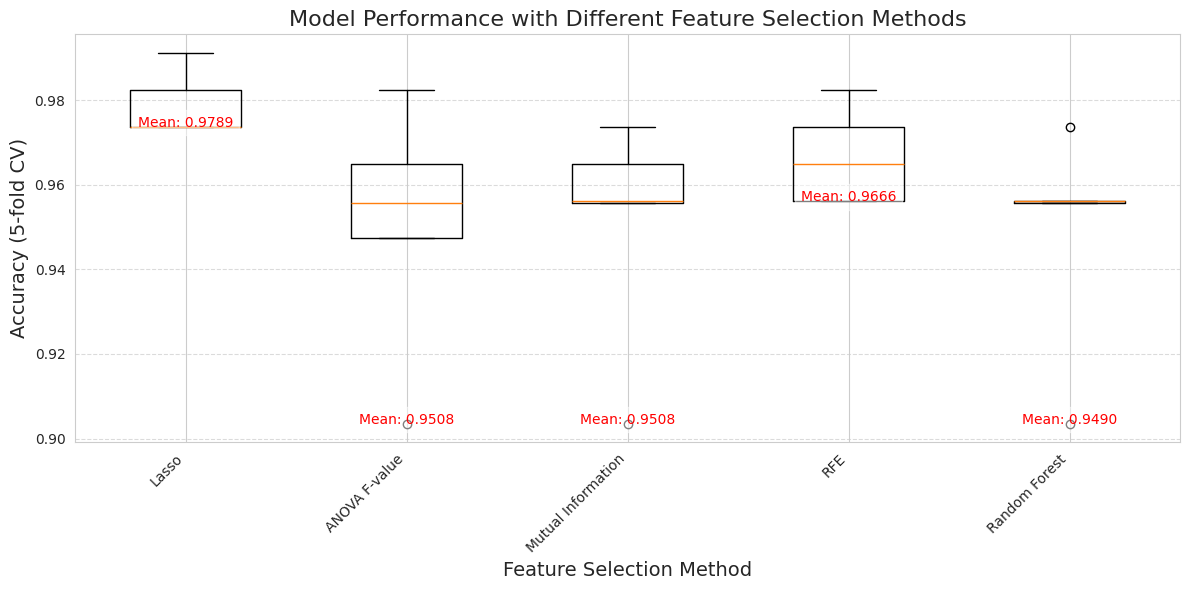

Feature Selection Methods Comparison:
--------------------------------------------------------------------------------
Lasso: mean radius, mean texture, mean perimeter, mean area, mean smoothness...
ANOVA F-value: mean radius, mean perimeter, mean area, mean concavity, mean concave points...
Mutual Information: mean radius, mean perimeter, mean area, mean concavity, mean concave points...
RFE: mean radius, mean concavity, mean concave points, mean symmetry, worst radius...
Random Forest: mean radius, mean perimeter, mean area, mean concavity, mean concave points...


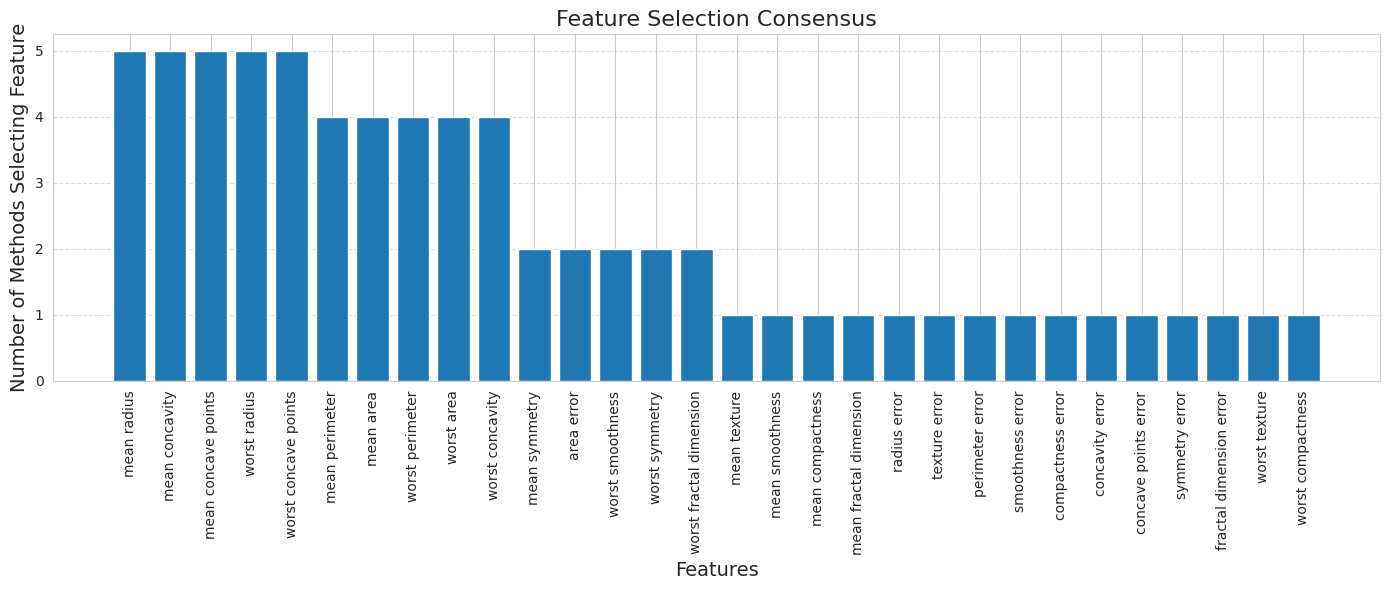

In [101]:
# Load breast cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
feature_names = cancer.feature_names

# Create figure
plt.figure(figsize=(18, 15))

# 1. Filter Method: ANOVA F-value
plt.subplot(2, 2, 1)
selector_f = SelectKBest(f_classif, k=10)
selector_f.fit(X, y)
scores_f = selector_f.scores_
indices_f = np.argsort(scores_f)[::-1]

plt.bar(range(10), scores_f[indices_f[:10]], align='center')
plt.xticks(range(10), [feature_names[i] for i in indices_f[:10]], rotation=45, ha='right')
plt.title('Top 10 Features (ANOVA F-value)', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('F-value Score', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7, axis='y')
plt.tight_layout()

# 2. Filter Method: Mutual Information
plt.subplot(2, 2, 2)
selector_mi = SelectKBest(mutual_info_classif, k=10)
selector_mi.fit(X, y)
scores_mi = selector_mi.scores_
indices_mi = np.argsort(scores_mi)[::-1]

plt.bar(range(10), scores_mi[indices_mi[:10]], align='center')
plt.xticks(range(10), [feature_names[i] for i in indices_mi[:10]], rotation=45, ha='right')
plt.title('Top 10 Features (Mutual Information)', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Mutual Information Score', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7, axis='y')
plt.tight_layout()

# 3. Wrapper Method: Recursive Feature Elimination (RFE)
plt.subplot(2, 2, 3)
model = LogisticRegression(solver='liblinear', max_iter=1000)
rfe = RFE(estimator=model, n_features_to_select=10)
rfe.fit(X, y)
ranks = rfe.ranking_

# Get the top 10 features
top_indices_rfe = np.where(ranks == 1)[0]
feature_importance_rfe = np.zeros(X.shape[1])
feature_importance_rfe[top_indices_rfe] = 1  # Just binary indicator for selected features

plt.bar(range(len(top_indices_rfe)), np.ones(len(top_indices_rfe)), align='center')
plt.xticks(range(len(top_indices_rfe)), [feature_names[i] for i in top_indices_rfe], rotation=45, ha='right')
plt.title('Top 10 Features (RFE)', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Selected (1=Yes)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7, axis='y')
plt.tight_layout()

# 4. Embedded Method: Random Forest Feature Importance
plt.subplot(2, 2, 4)
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X, y)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

plt.bar(range(10), importances[indices[:10]], align='center')
plt.xticks(range(10), [feature_names[i] for i in indices[:10]], rotation=45, ha='right')
plt.title('Top 10 Features (Random Forest Importance)', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7, axis='y')
plt.tight_layout()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.suptitle('Feature Selection Methods Comparison', fontsize=18)
plt.subplots_adjust(top=0.9)
plt.show()

# Compare model performance with different feature selection methods
feature_selector_methods = {
    'Lasso': 'all',
    'ANOVA F-value': SelectKBest(f_classif, k=10),
    'Mutual Information': SelectKBest(mutual_info_classif, k=10),
    'RFE': RFE(LogisticRegression(solver='liblinear', max_iter=1000), n_features_to_select=10),
    'Random Forest': SelectKBest(lambda X, y: RandomForestClassifier(n_estimators=100, random_state=42).fit(X, y).feature_importances_, k=10)
}

# Evaluate each method
results = {}
for name, selector in feature_selector_methods.items():
    if selector == 'all':
        # No feature selection
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', LogisticRegression(solver='liblinear', max_iter=1000))
        ])
    else:
        # With feature selection
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('selector', selector),
            ('classifier', LogisticRegression(solver='liblinear', max_iter=1000))
        ])

    # Cross-validated scores
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
    results[name] = scores

# Plot results
plt.figure(figsize=(12, 6))
box_data = [results[method] for method in feature_selector_methods.keys()]
plt.boxplot(box_data, labels=list(feature_selector_methods.keys()))
plt.title('Model Performance with Different Feature Selection Methods', fontsize=16)
plt.xlabel('Feature Selection Method', fontsize=14)
plt.ylabel('Accuracy (5-fold CV)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7, axis='y')
plt.xticks(rotation=45, ha='right')

# Add mean accuracy values as text
for i, (method, scores) in enumerate(results.items()):
    plt.text(i+1, min(scores), f'Mean: {np.mean(scores):.4f}',
             horizontalalignment='center', size=10, color='red',
             bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()

# Display summary of selected features by each method
print("Feature Selection Methods Comparison:")
print("-" * 80)

all_selected_features = {}
for name, selector in feature_selector_methods.items():
    if selector == 'all':
        selected = list(feature_names)
    else:
        # Apply selector
        selector.fit(X, y)
        if hasattr(selector, 'get_support'):
            mask = selector.get_support()
        else:  # For RFE
            mask = selector.ranking_ == 1
        selected = list(feature_names[mask])

    all_selected_features[name] = selected
    print(f"{name}: {', '.join(selected[:5])}{'...' if len(selected) > 5 else ''}")

# Count how many methods selected each feature
feature_counts = {}
for feature in feature_names:
    count = sum([1 for method_features in all_selected_features.values() if feature in method_features])
    feature_counts[feature] = count

# Plot feature consensus
plt.figure(figsize=(14, 6))
sorted_features = sorted(feature_counts.items(), key=lambda x: x[1], reverse=True)
feature_names_sorted = [x[0] for x in sorted_features]
counts = [x[1] for x in sorted_features]

plt.bar(range(len(feature_names)), counts)
plt.xticks(range(len(feature_names)), feature_names_sorted, rotation=90)
plt.title('Feature Selection Consensus', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Number of Methods Selecting Feature', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7, axis='y')
plt.tight_layout()
plt.show()

## 3. Reinforcement Learning

In [102]:
class GridWorld:
    def __init__(self, size=5, obstacles=None, goal_pos=(4, 4), start_pos=(0, 0)):
        self.size = size
        self.obstacles = obstacles if obstacles else [(1, 1), (2, 2), (3, 1)]
        self.goal_pos = goal_pos
        self.start_pos = start_pos
        self.agent_pos = start_pos
        self.actions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Right, Down, Left, Up
        self.action_names = ['Right', 'Down', 'Left', 'Up']
        self.reset()

    def reset(self):
        self.agent_pos = self.start_pos
        return self.agent_pos

    def step(self, action_idx):
        action = self.actions[action_idx]

        # Calculate new position
        new_pos = (self.agent_pos[0] + action[0], self.agent_pos[1] + action[1])

        # Check if valid move (within grid and not an obstacle)
        if (0 <= new_pos[0] < self.size and
            0 <= new_pos[1] < self.size and
            new_pos not in self.obstacles):
            self.agent_pos = new_pos

        # Determine reward and done flag
        if self.agent_pos == self.goal_pos:
            reward = 10
            done = True
        elif self.agent_pos in self.obstacles:
            reward = -10
            done = True
        else:
            reward = -1  # Small penalty for each step
            done = False

        return self.agent_pos, reward, done

    def render(self, q_table=None, show_values=False):
        # Create a figure and axis
        fig, ax = plt.subplots(figsize=(8, 8))

        # Draw grid
        for i in range(self.size + 1):
            ax.axhline(i, color='black', lw=1)
            ax.axvline(i, color='black', lw=1)

        # Color the goal cell
        goal_rect = patches.Rectangle((self.goal_pos[1], self.goal_pos[0]),
                                     1, 1, linewidth=0, edgecolor=None, facecolor='green', alpha=0.3)
        ax.add_patch(goal_rect)

        # Color obstacle cells
        for obs in self.obstacles:
            obs_rect = patches.Rectangle((obs[1], obs[0]),
                                         1, 1, linewidth=0, edgecolor=None, facecolor='red', alpha=0.3)
            ax.add_patch(obs_rect)

        # Show agent
        agent_circle = plt.Circle((self.agent_pos[1] + 0.5, self.agent_pos[0] + 0.5),
                                 0.3, color='blue')
        ax.add_patch(agent_circle)

        # If Q-table is provided, visualize the policy
        if q_table is not None:
            for i in range(self.size):
                for j in range(self.size):
                    if (i, j) not in self.obstacles and (i, j) != self.goal_pos:
                        # Get best action
                        state = (i, j)
                        best_action = np.argmax(q_table[state])

                        # Draw arrow for policy
                        action = self.actions[best_action]
                        arrow_x = j + 0.5
                        arrow_y = i + 0.5
                        dx = action[1] * 0.3
                        dy = action[0] * 0.3
                        ax.arrow(arrow_x, arrow_y, dx, dy, head_width=0.1, head_length=0.1, fc='black', ec='black')

                        # Show values if requested
                        if show_values:
                            best_value = np.max(q_table[state])
                            ax.text(j + 0.5, i + 0.2, f"{best_value:.1f}", ha='center', size=9)

        # Set limits and remove ticks
        ax.set_xlim(0, self.size)
        ax.set_ylim(0, self.size)
        ax.set_xticks([])
        ax.set_yticks([])

        # Invert y-axis to match grid coordinates
        ax.invert_yaxis()

        # Add title and labels
        plt.title('Grid World')
        plt.tight_layout()
        plt.show()

In [106]:
# Q-learning algorithm
def q_learning(env, episodes=200, alpha=0.1, gamma=0.9, epsilon=0.1, visualize=True, visualize_interval=20):
    # Initialize Q-table with zeros
    states = [(i, j) for i in range(env.size) for j in range(env.size)]
    q_table = {state: np.zeros(len(env.actions)) for state in states}

    # Metrics to track progress
    rewards_per_episode = []
    steps_per_episode = []

    # Training loop
    for episode in range(episodes):
        state = env.reset()
        done = False
        total_reward = 0
        steps = 0

        while not done:
            # Epsilon-greedy action selection
            if np.random.random() < epsilon:
                action = np.random.randint(len(env.actions))  # Explore
            else:
                action = np.argmax(q_table[state])  # Exploit

            # Take action and observe next state and reward
            next_state, reward, done = env.step(action)

            # Q-learning update
            old_value = q_table[state][action]
            next_max = np.max(q_table[next_state])

            # Q-learning formula: Q(s,a) = Q(s,a) + α * [R + γ * max(Q(s',a')) - Q(s,a)]
            new_value = old_value + alpha * (reward + gamma * next_max - old_value)
            q_table[state][action] = new_value

            # Move to next state
            state = next_state
            total_reward += reward
            steps += 1

            # Visualize only at specified intervals to avoid too many plots
            if visualize and episode % visualize_interval == 0 and done:
                clear_output(wait=True)
                print(f"Episode: {episode}")
                env.render(q_table, show_values=True)

        # Collect metrics
        rewards_per_episode.append(total_reward)
        steps_per_episode.append(steps)

        # Decay epsilon
        epsilon = max(0.01, epsilon * 0.995)

    # Plot learning curves
    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    plt.plot(rewards_per_episode)
    plt.title('Rewards per Episode')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(steps_per_episode)
    plt.title('Steps per Episode')
    plt.xlabel('Episode')
    plt.ylabel('Steps')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    return q_table

Episode: 150


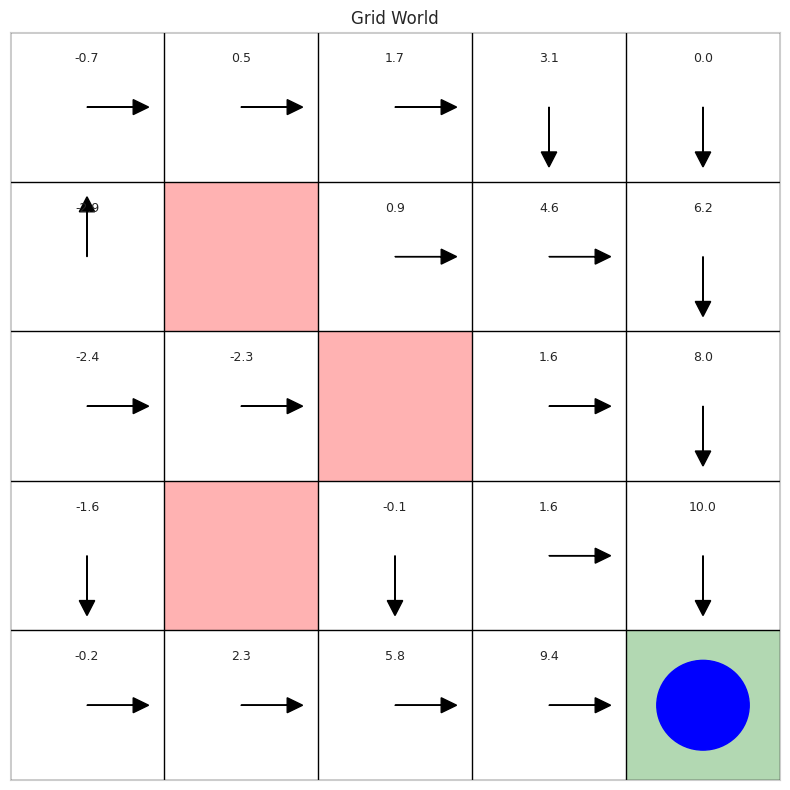

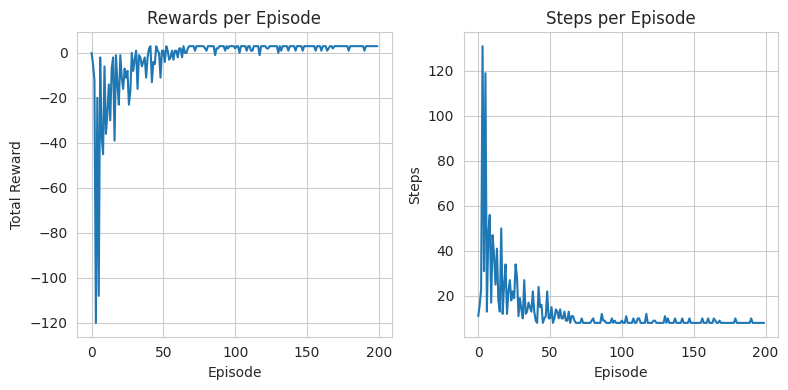

Final Policy:


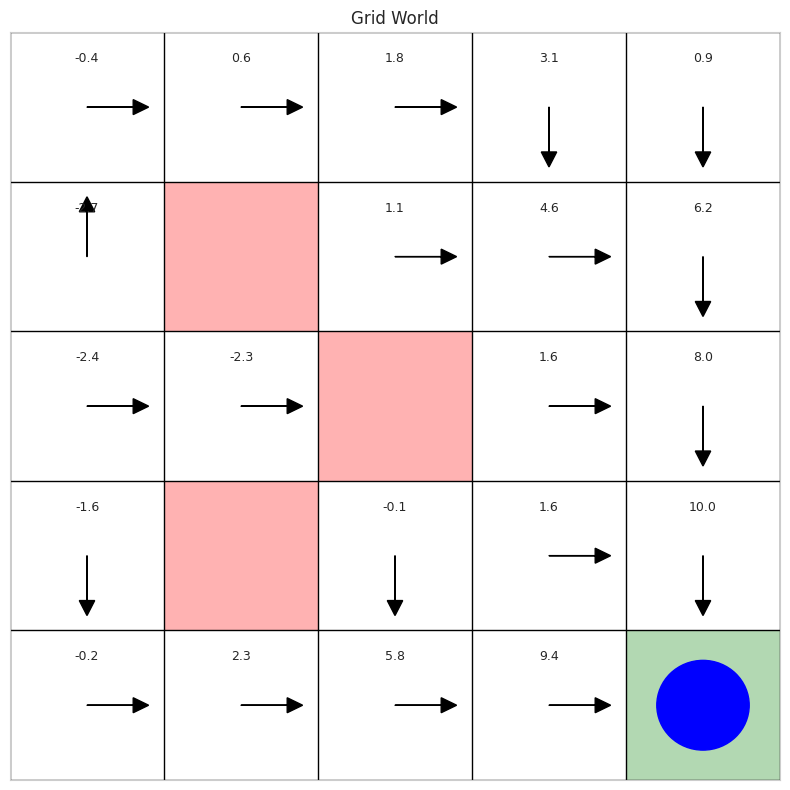

In [108]:
# Create environment
env = GridWorld(size=5)

# Visualize initial state
print("Initial Grid World:")
env.render()

# Train with Q-learning
q_table = q_learning(env, episodes=200, visualize=True, visualize_interval=50)

# Visualize final policy
print("Final Policy:")
env.render(q_table, show_values=True)

Step: 8, Action: Down, Reward: 10


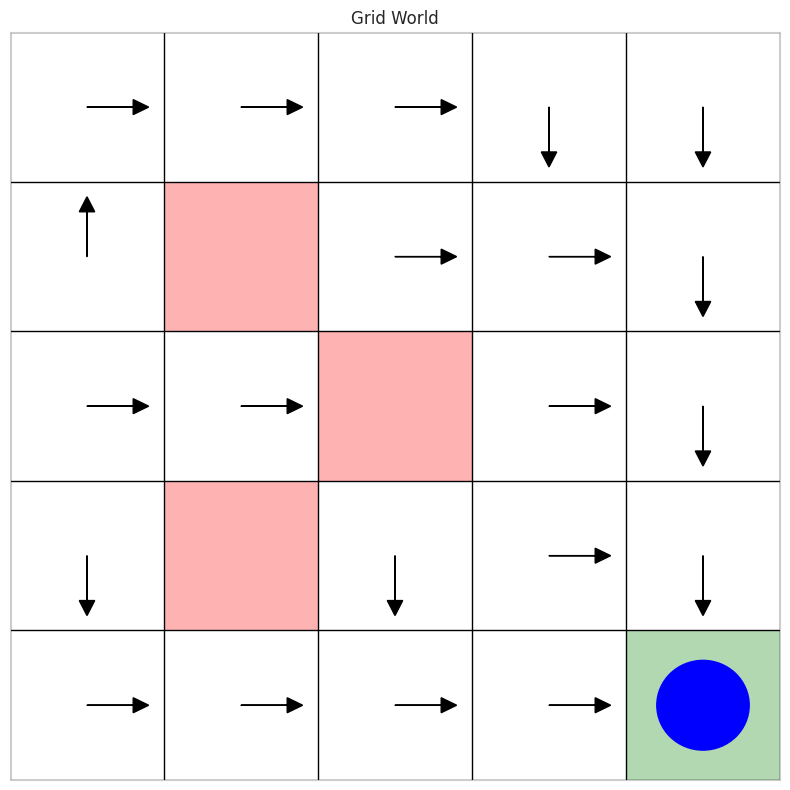

Policy execution completed in 8 steps with total reward: 3


In [109]:
# Demonstrate learned policy
def show_policy_execution(env, q_table, max_steps=20):
    state = env.reset()
    done = False
    total_reward = 0
    step = 0

    print("Starting policy execution...")
    env.render(q_table)
    time.sleep(1)

    while not done and step < max_steps:
        # Select best action from Q-table
        action = np.argmax(q_table[state])

        # Take action
        next_state, reward, done = env.step(action)

        # Update state and metrics
        state = next_state
        total_reward += reward
        step += 1

        # Visualize
        clear_output(wait=True)
        print(f"Step: {step}, Action: {env.action_names[action]}, Reward: {reward}")
        env.render(q_table)
        time.sleep(0.5)

    print(f"Policy execution completed in {step} steps with total reward: {total_reward}")

# Show execution of learned policy
show_policy_execution(env, q_table)